# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [492]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [493]:
df.shape

(175777, 14)

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [498]:
df.describe().T

count         mean          std   min      25%  \
market_id                 175777.0     2.743726     1.330963   1.0     2.00   
store_primary_category    175777.0    35.887949    20.728254   0.0    18.00   
order_protocol            175777.0     2.911752     1.513128   1.0     1.00   
total_items               175777.0     3.204976     2.674055   1.0     2.00   
subtotal                  175777.0  2697.111147  1828.554893   0.0  1412.00   
num_distinct_items        175777.0     2.675060     1.625681   1.0     1.00   
min_item_price            175777.0   684.965433   519.882924 -86.0   299.00   
max_item_price            175777.0  1160.158616   560.828571   0.0   799.00   
total_onshift_dashers     175777.0    44.918664    34.544724  -4.0    17.00   
total_busy_dashers        175777.0    41.861381    32.168505  -5.0    15.00   
total_outstanding_orders  175777.0    58.230115    52.731043  -6.0    17.00   
distance                  175777.0    21.843090     8.748712   0.0    15.36   

                              50%      75%       max  
market_id                    2.00     4.00      6.00  
store_primary_category      38.00    55.00     72.00  
order_protocol               3.00     4.00      7.00  
total_items                  3.00     4.00    411.00  
subtotal                  2224.00  3410.00  26800.00  
num_distinct_items           2.00     3.00     20.00  
min_item_price             595.00   942.00  14700.00  
max_item_price            1095.00  1395.00  14700.00  
total_onshift_dashers       37.00    66.00    171.00  
total_busy_dashers          35.00    63.00    154.00  
total_outstanding_orders    41.00    85.00    285.00  
distance                    21.76    28.12     83.52

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [503]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [506]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('int')
df['order_protocol'] = df['order_protocol'].astype('int')
df['total_onshift_dashers'] = df['total_onshift_dashers'].astype('int')
df['total_busy_dashers'] = df['total_busy_dashers'].astype('int')
df['total_outstanding_orders'] = df['total_outstanding_orders'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int32         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int32         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int32         
 11  total_busy_dashers        175777 non-null  int32         
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [510]:
# Calculate time taken in minutes
df['time_taken_mins'] = round(((df['actual_delivery_time']- df['created_at']).dt.seconds / 60),2)
df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1          2 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2          2 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3          1 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4          1 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  time_taken_mins  
0                        21     34.44             47.0  
1                         2     27.60             44.0  
2                        18     11.56             55.0  
3                         8     31.80             59.0  
4                         7      8.20             46.0

In [512]:
df.describe().T

count                           mean  \
market_id                 175777.0                       2.743726   
created_at                  175777  2015-02-04 19:57:50.009631744   
actual_delivery_time        175777  2015-02-04 20:44:02.190406144   
store_primary_category    175777.0                      35.887949   
order_protocol            175777.0                       2.911752   
total_items               175777.0                       3.204976   
subtotal                  175777.0                    2697.111147   
num_distinct_items        175777.0                        2.67506   
min_item_price            175777.0                     684.965433   
max_item_price            175777.0                    1160.158616   
total_onshift_dashers     175777.0                      44.918664   
total_busy_dashers        175777.0                      41.861381   
total_outstanding_orders  175777.0                      58.230115   
distance                  175777.0                       21.84309   
time_taken_mins           175777.0                      46.203013   

                                          min                  25%  \
market_id                                 1.0                  2.0   
created_at                2015-01-21 15:22:03  2015-01-29 01:31:19   
actual_delivery_time      2015-01-21 16:07:03  2015-01-29 02:16:30   
store_primary_category                    0.0                 18.0   
order_protocol                            1.0                  1.0   
total_items                               1.0                  2.0   
subtotal                                  0.0               1412.0   
num_distinct_items                        1.0                  1.0   
min_item_price                          -86.0                299.0   
max_item_price                            0.0                799.0   
total_onshift_dashers                    -4.0                 17.0   
total_busy_dashers                       -5.0                 15.0   
total_outstanding_orders                 -6.0                 17.0   
distance                                  0.0                15.36   
time_taken_mins                          32.0                 39.0   

                                          50%                  75%  \
market_id                                 2.0                  4.0   
created_at                2015-02-05 02:41:26  2015-02-12 01:04:32   
actual_delivery_time      2015-02-05 03:34:33  2015-02-12 01:48:24   
store_primary_category                   38.0                 55.0   
order_protocol                            3.0                  4.0   
total_items                               3.0                  4.0   
subtotal                               2224.0               3410.0   
num_distinct_items                        2.0                  3.0   
min_item_price                          595.0                942.0   
max_item_price                         1095.0               1395.0   
total_onshift_dashers                    37.0                 66.0   
total_busy_dashers                       35.0                 63.0   
total_outstanding_orders                 41.0                 85.0   
distance                                21.76                28.12   
time_taken_mins                          45.0                 52.0   

                                          max          std  
market_id                                 6.0     1.330963  
created_at                2015-02-18 06:00:44          NaN  
actual_delivery_time      2015-02-18 06:51:10          NaN  
store_primary_category                   72.0    20.728254  
order_protocol                            7.0     1.513128  
total_items                             411.0     2.674055  
subtotal                              26800.0  1828.554893  
num_distinct_items                       20.0     1.625681  
min_item_price                        14700.0   519.882924  
max_item_price                        14700.0   560.828571  
total_onshi

In [514]:
df['min_item_price'] = abs(df['min_item_price'])
df['total_onshift_dashers'] = abs(df['total_onshift_dashers'])
df['total_busy_dashers'] = abs(df['total_busy_dashers'])
df['total_outstanding_orders'] = abs(df['total_outstanding_orders'])

In [516]:
df['min_item_price'].mean(),df['total_onshift_dashers'].mean(),df['total_busy_dashers'].mean(),df['total_outstanding_orders'].mean()

(684.9696319768798, 44.91910773309363, 41.861813547847554, 58.23140115032115)

In [518]:
df['min_item_price'].mean(),df['total_onshift_dashers'].mean(),df['total_busy_dashers'].mean(),df['total_outstanding_orders'].mean(),df['distance'].mean()


(684.9696319768798,
 44.91910773309363,
 41.861813547847554,
 58.23140115032115,
 21.843089596477352)

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [520]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_month'] = df['created_at'].dt.month
df['order_day'] = df['created_at'].dt.day
df['order_weekday'] = df['created_at'].dt.weekday
df['order_hour'] = df['created_at'].dt.hour
# Create a categorical feature 'isWeekend'
df['order_weekend'] = df['order_weekday'].apply(lambda x: 1 if x in [5,6] else 0)


df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1          2 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2          2 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3          1 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4          1 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  time_taken_mins  order_month  \
0                        21     34.44             47.0            2   
1                         2     27.60             44.0            2   
2                        18     11.56             55.0            2   
3                         8     31.80             59.0            2   
4                         7      8.20             46.0            1   

   order_day  order_weekday  order_hour  order_weekend  
0          6              4          22              0  
1         10              1          21              0  
2         16              0           0              0  
3         12              3           3              0  
4         27              1           2              0

In [522]:
# Drop unnecessary columns
df.drop(columns=['market_id','created_at','actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [526]:
# Define target variable (y) and features (X)
X = df.drop(columns=['time_taken_mins'])
y = df['time_taken_mins']


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [529]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

In [531]:
# X_train.shape, X_test.shape,y_train.shape, y_test.shape
df_train.shape, df_test.shape

((140621, 17), (35156, 17))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [535]:
df_train.columns

Index(['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_mins',
       'order_month', 'order_day', 'order_weekday', 'order_hour',
       'order_weekend'],
      dtype='object')

In [539]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = [
       'store_primary_category', 'order_protocol', 'total_items', 
       'num_distinct_items', 
       'order_month', 'order_day', 'order_weekday', 'order_hour',
       'order_weekend']
numrical_cols = [i for i in df.columns if i not in categorical_cols]
numrical_cols

['subtotal',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'time_taken_mins']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

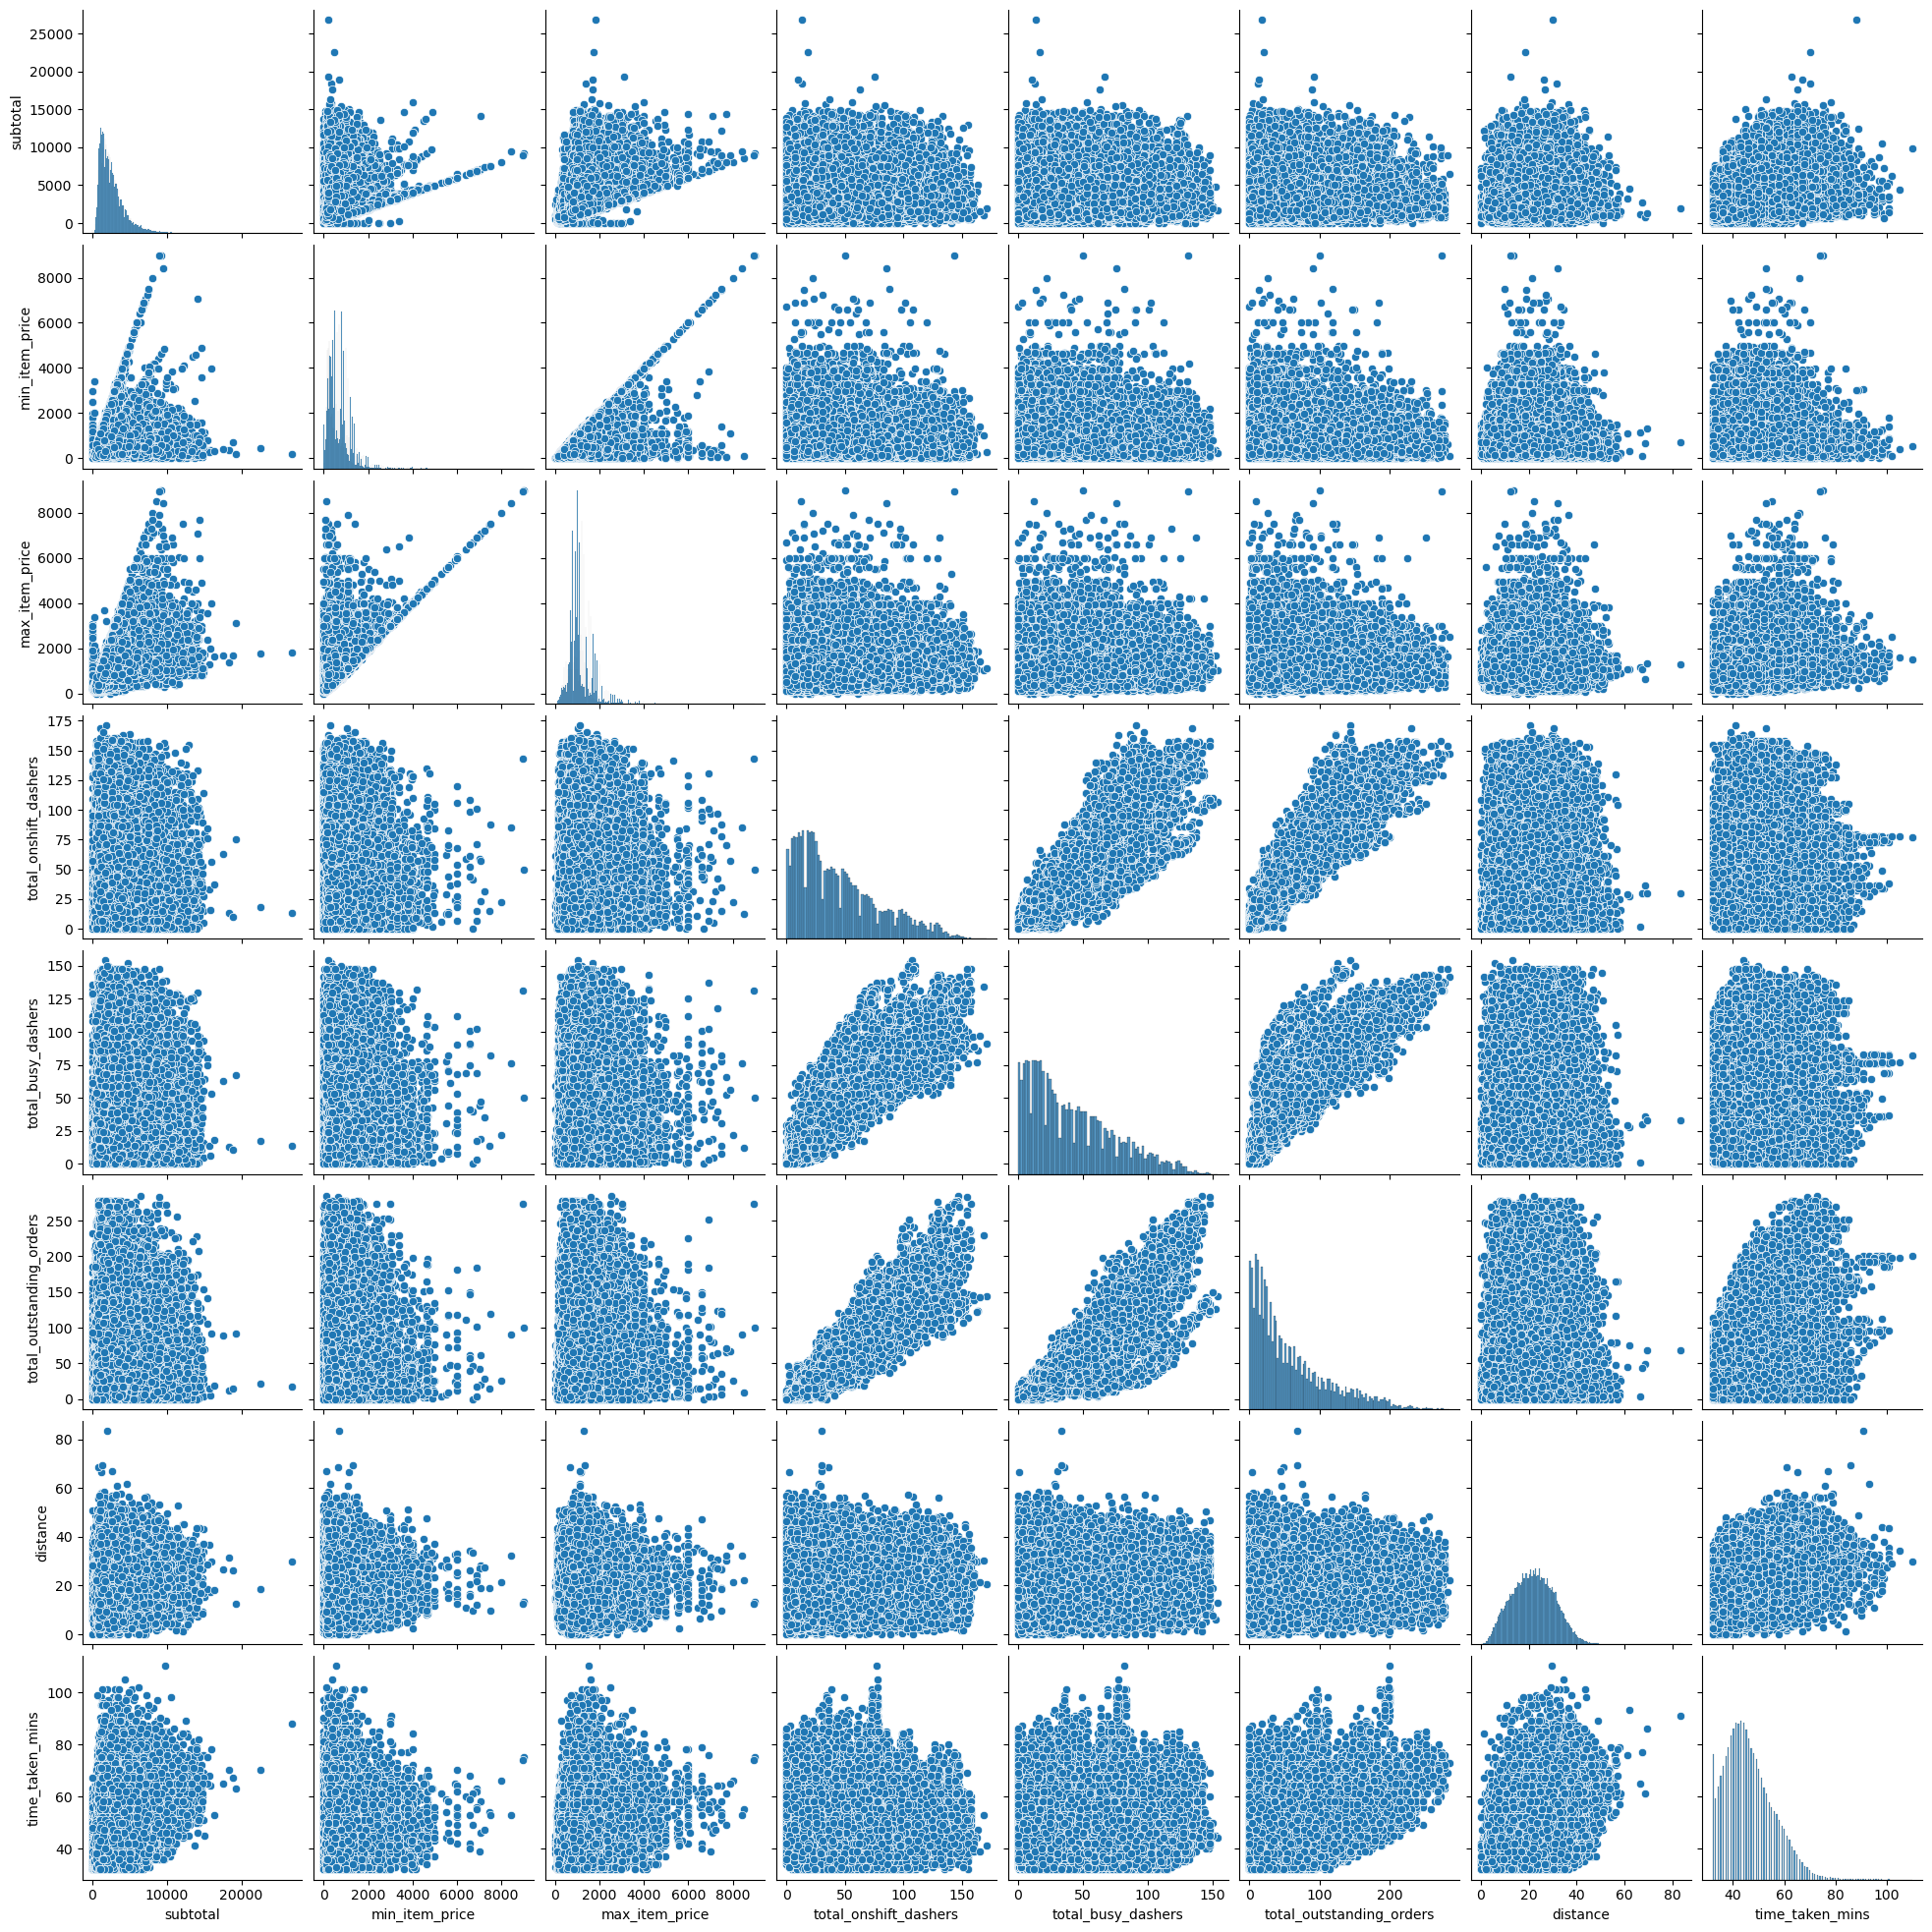

In [52]:
# Plot distributions for all numerical columns

sns.pairplot(df_train[numrical_cols])
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

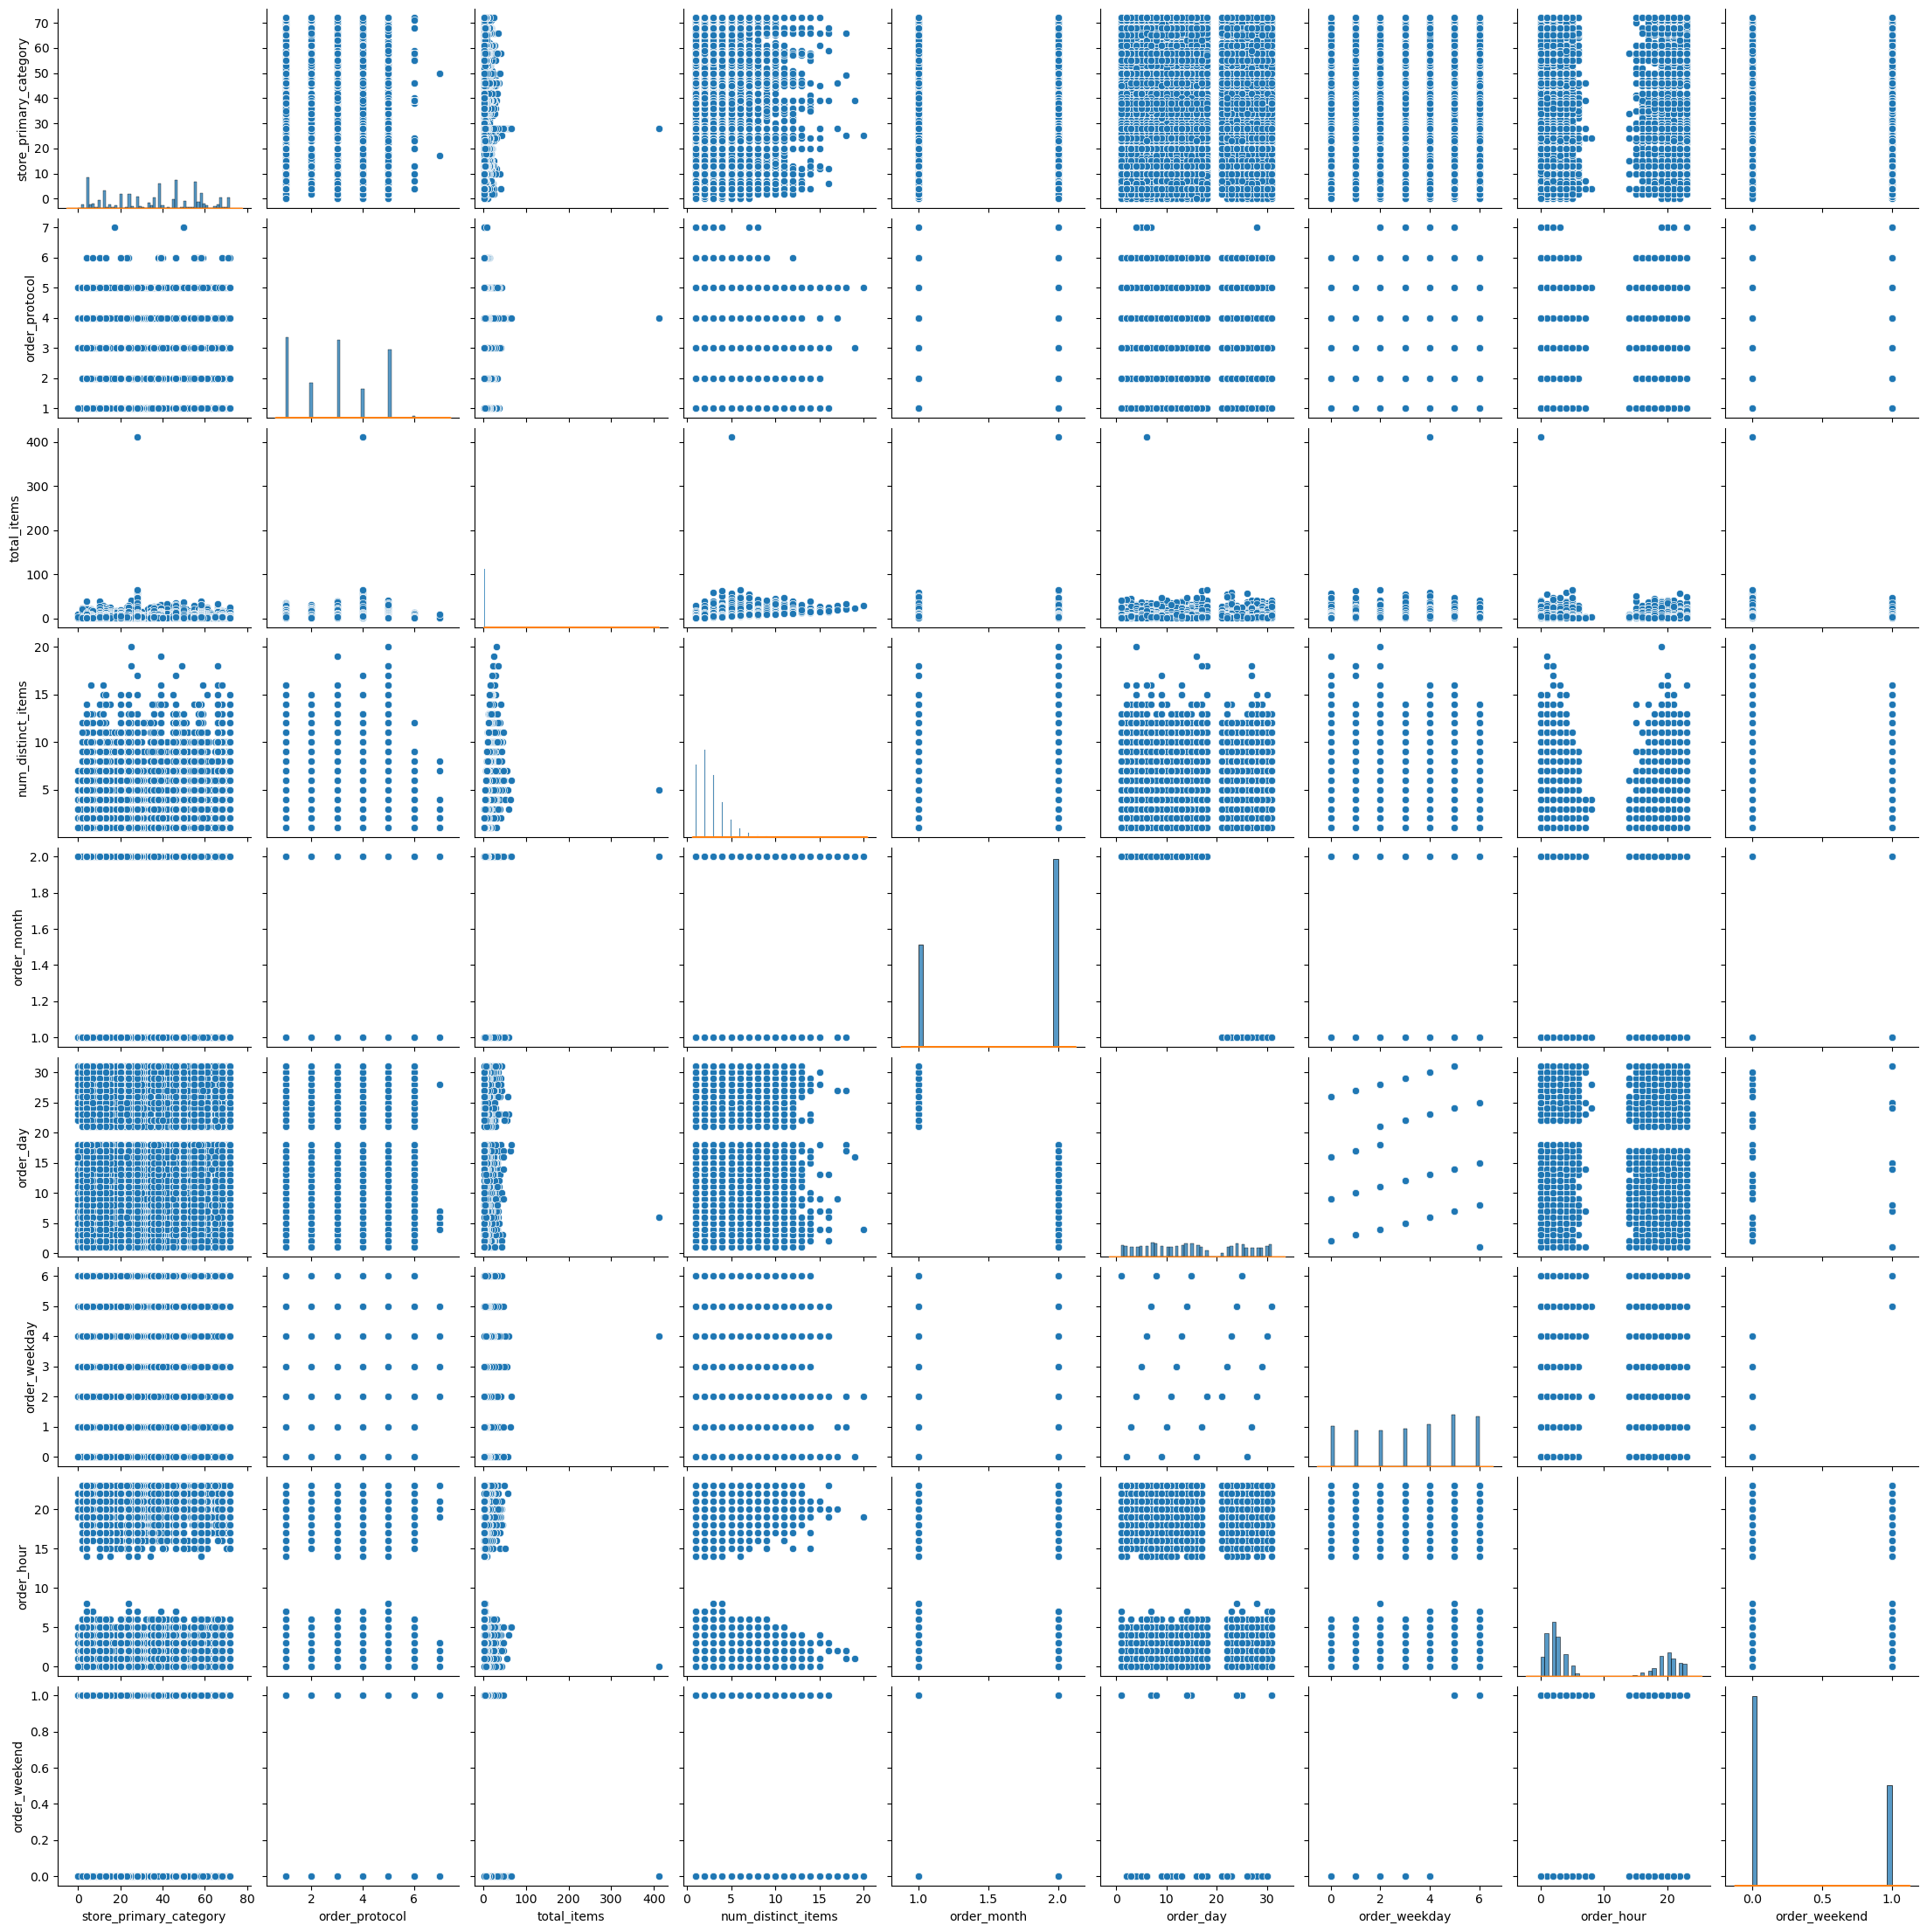

In [54]:
# Distribution of categorical columns

g = sns.pairplot(df[categorical_cols])
g.map_diag(sns.kdeplot, fill=True)

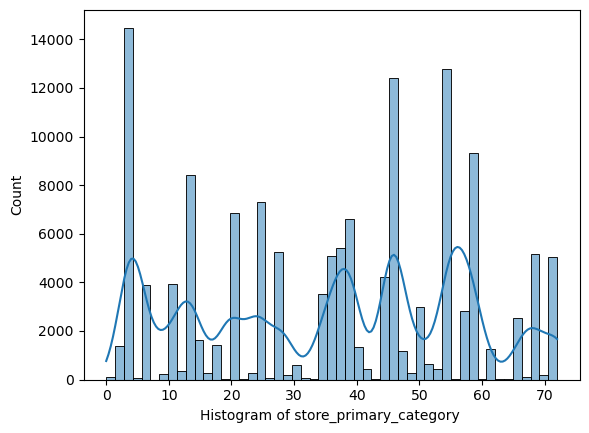

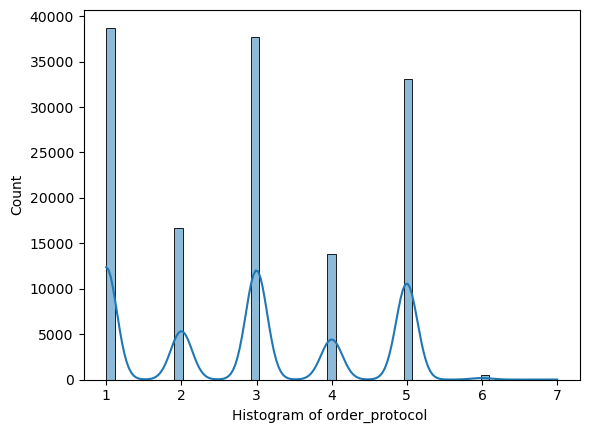

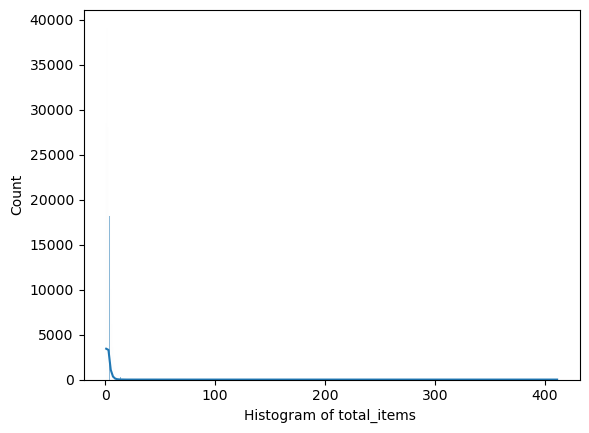

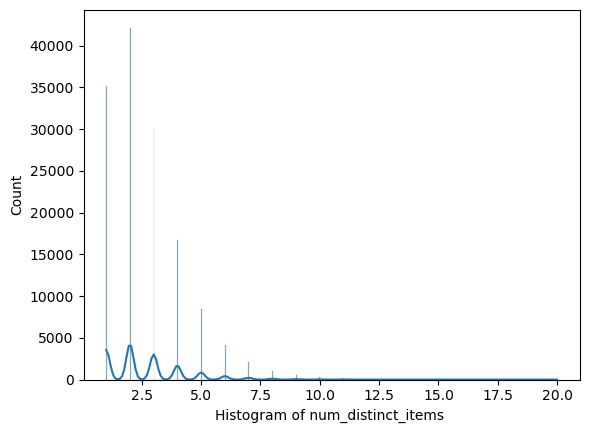

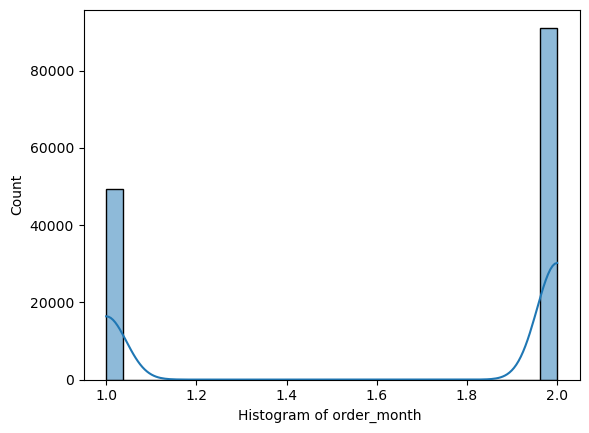

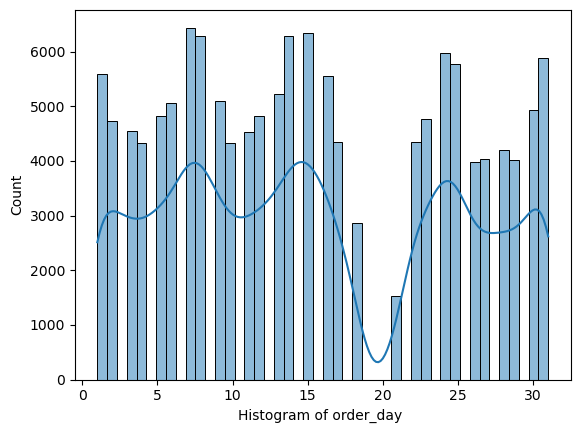

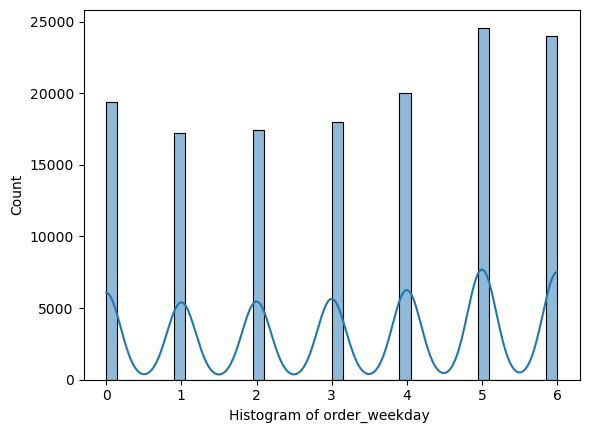

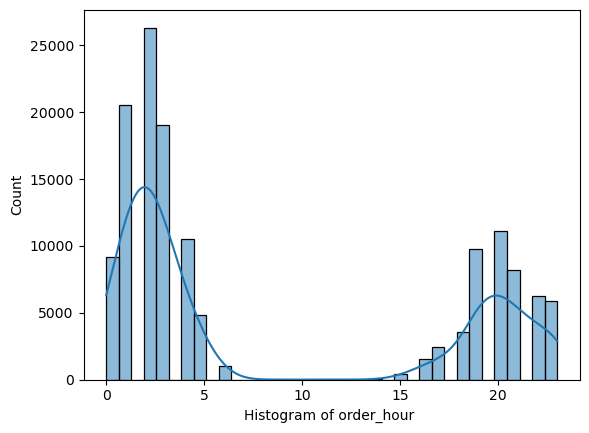

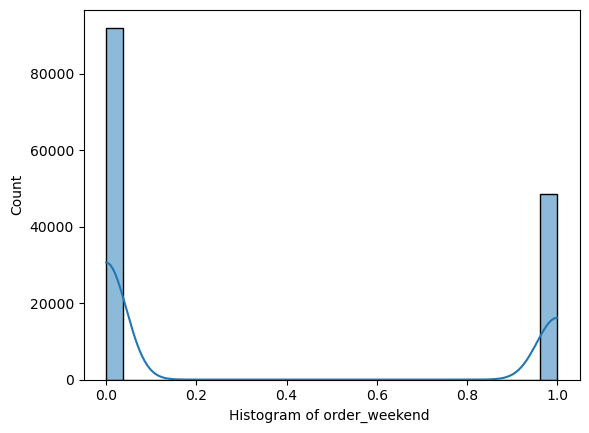

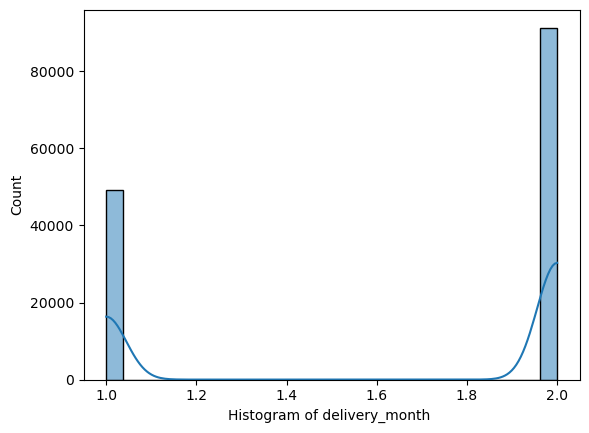

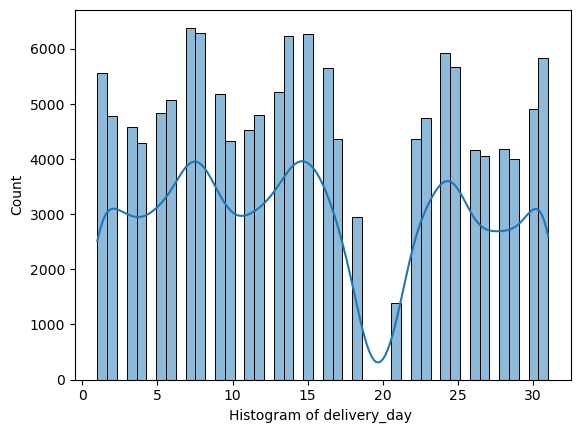

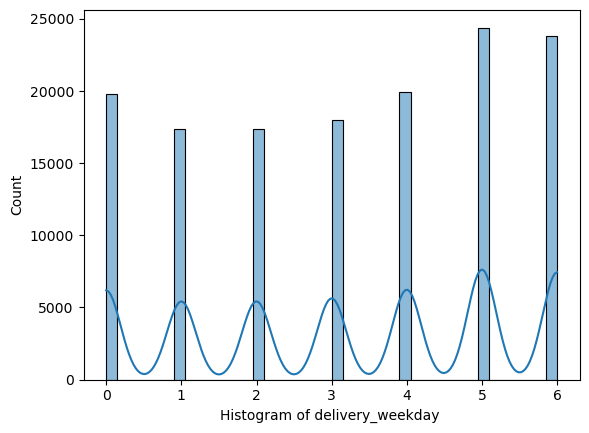

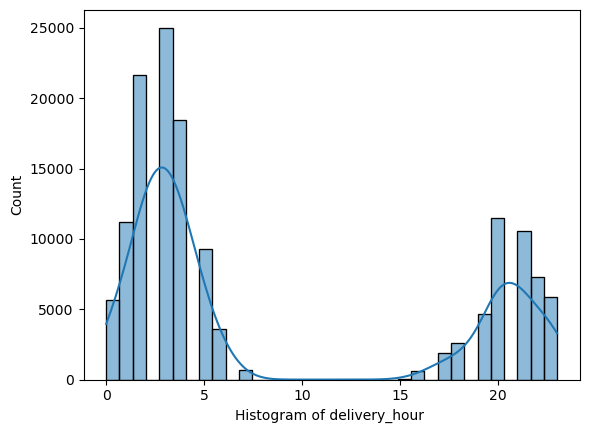

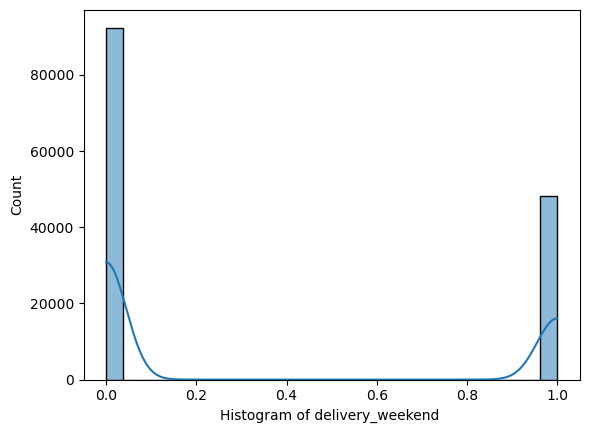

In [104]:
for i in categorical_cols:
    sns.histplot(data= df_train, x=i, kde=True)
    plt.xlabel('Histogram of {i} '.format(i=i))
    plt.show()

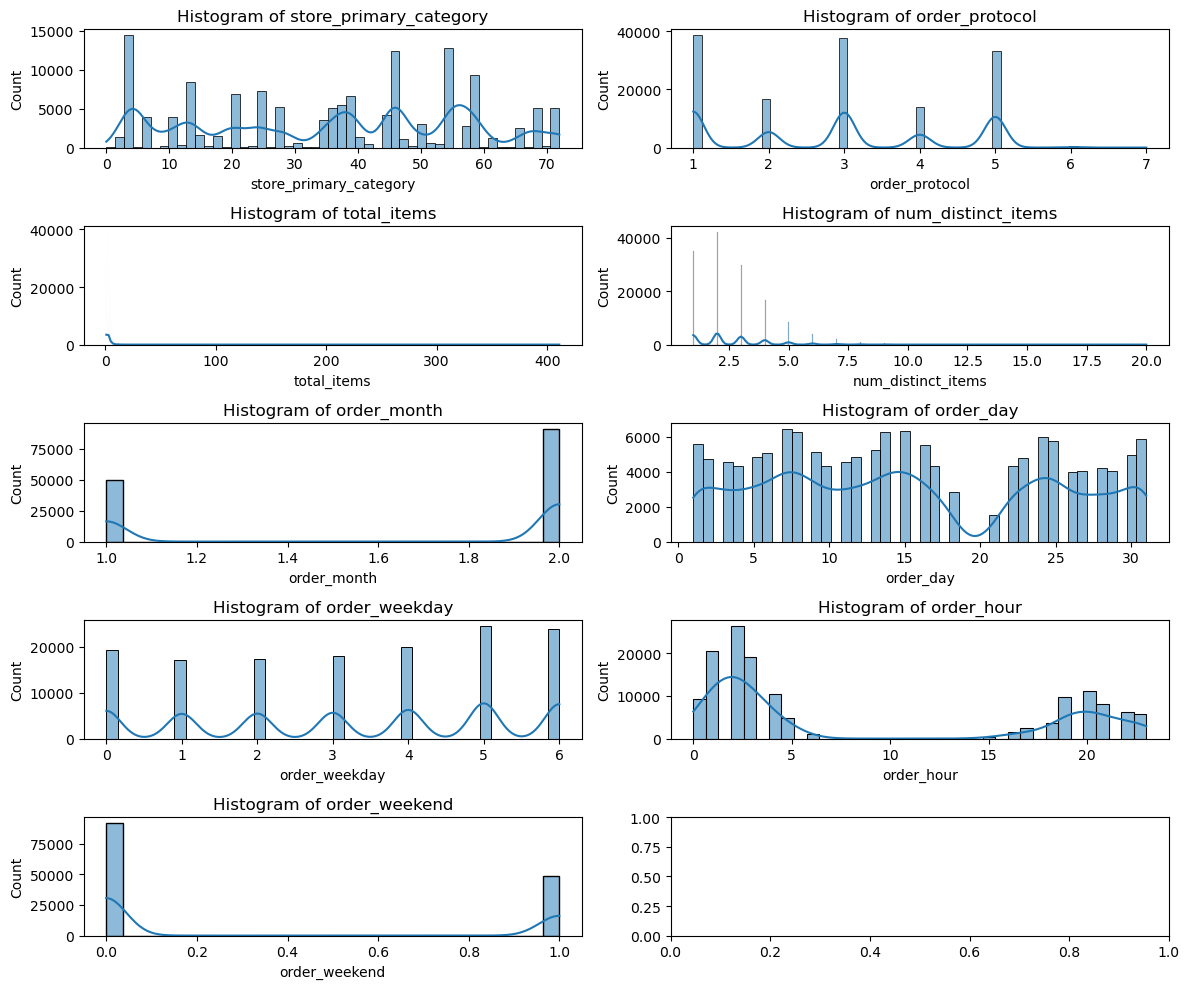

In [566]:

fig, ax = plt.subplots(5, 2, figsize=(12, 10))  # Increase figure size

for idx, col in enumerate(categorical_cols):
    row, col_pos = divmod(idx, 2)  # Get row and column indices
    sns.histplot(data=df_train, x=col, kde=True, ax=ax[row, col_pos])  # Assign ax
    ax[row, col_pos].set_title(f'Histogram of {col}')  # Correct title format

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

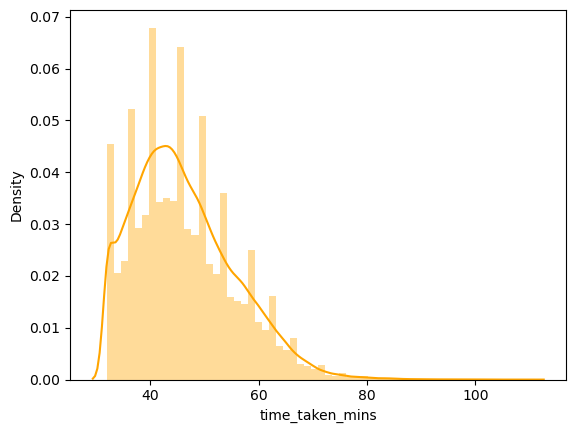

In [327]:
# Distribution of time_taken
sns.distplot(df_train['time_taken_mins'],bins=60,kde=True,color='Orange')
# plt.xti
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

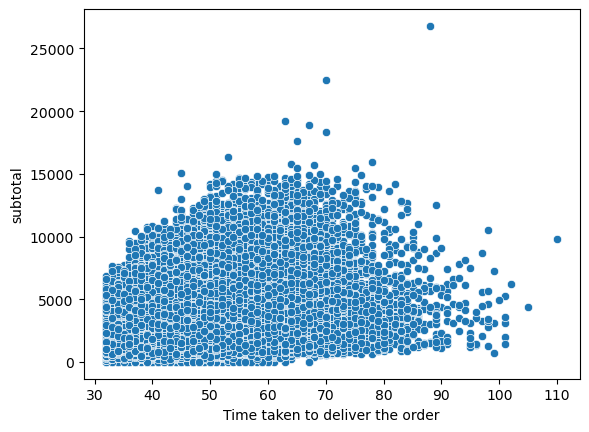

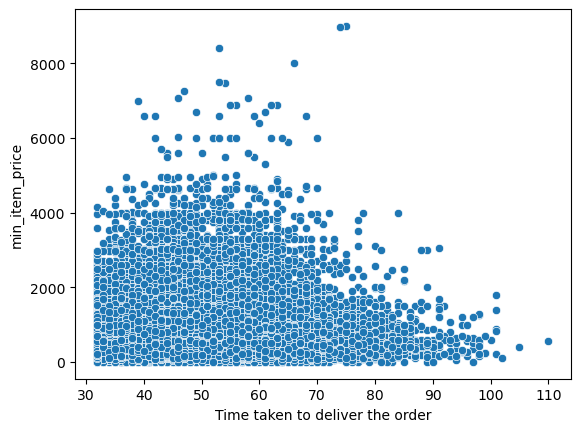

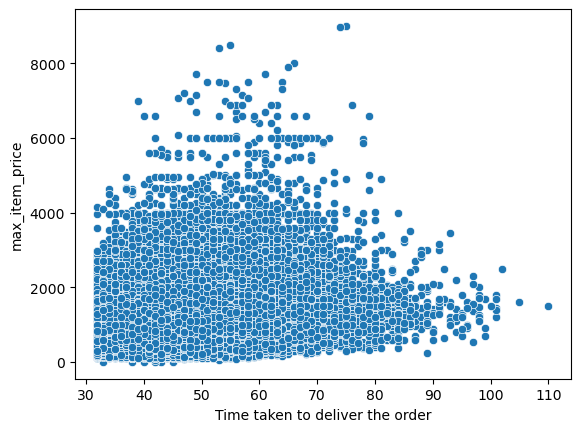

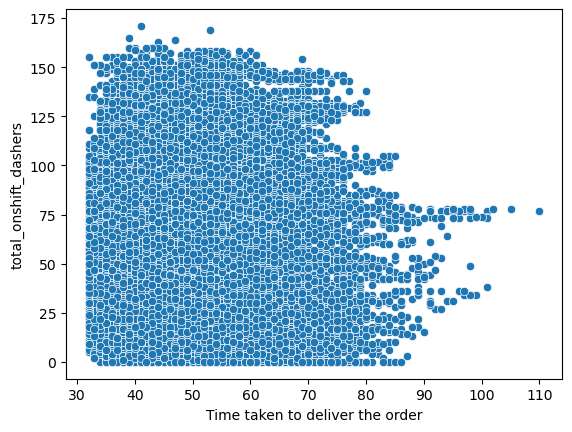

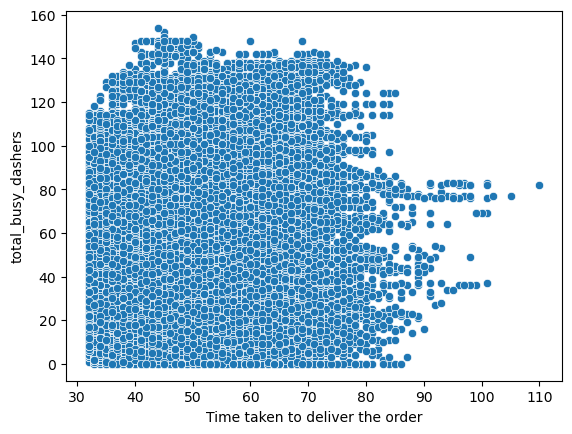

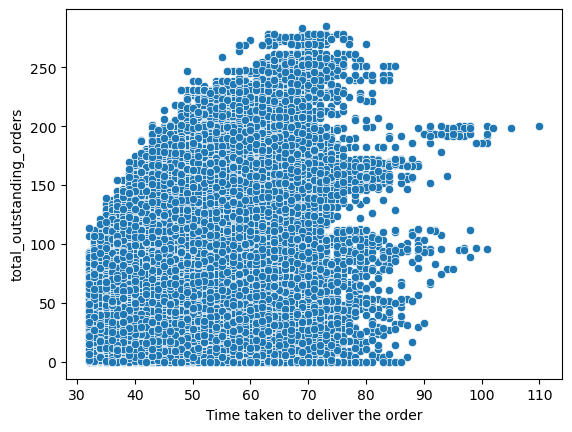

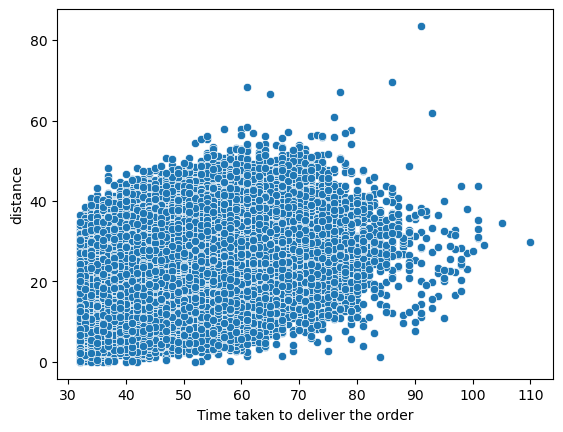

In [331]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in numrical_cols[:-1]:
    sns.scatterplot(df_train, x='time_taken_mins', y=i)
    plt.xlabel('Time taken to deliver the order')
    plt.ylabel(i)
    plt.show()

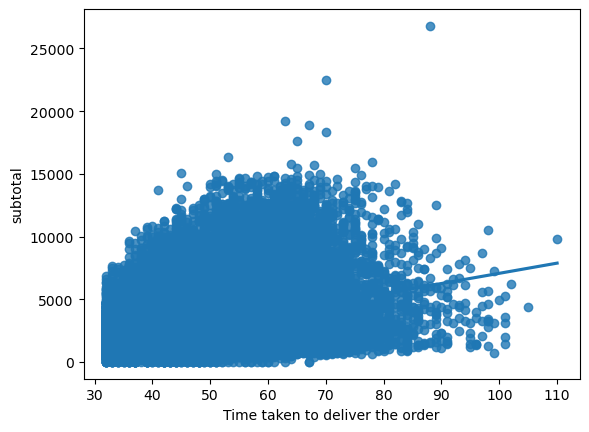

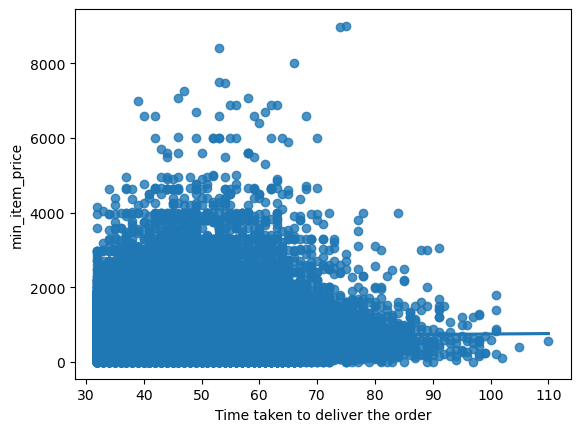

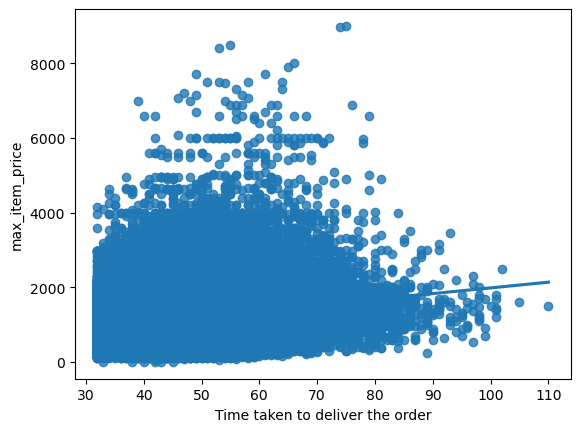

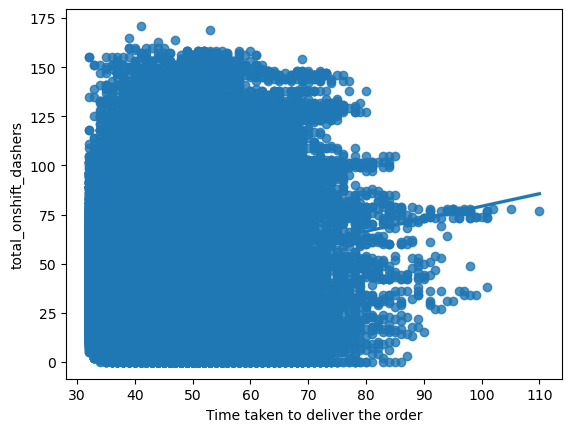

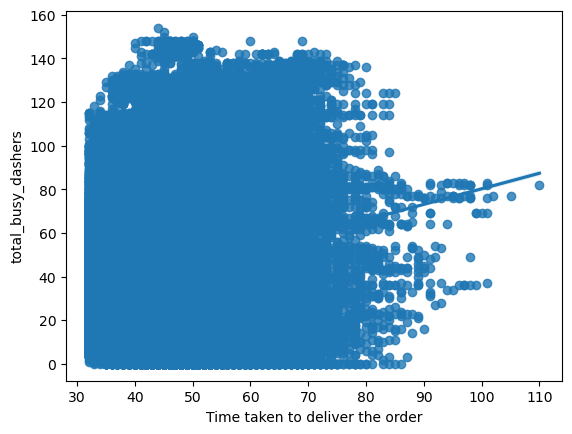

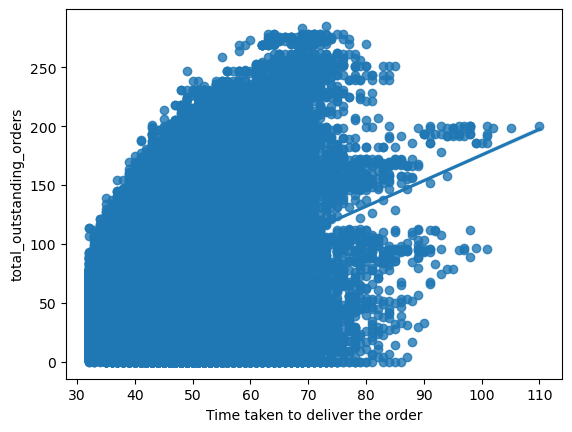

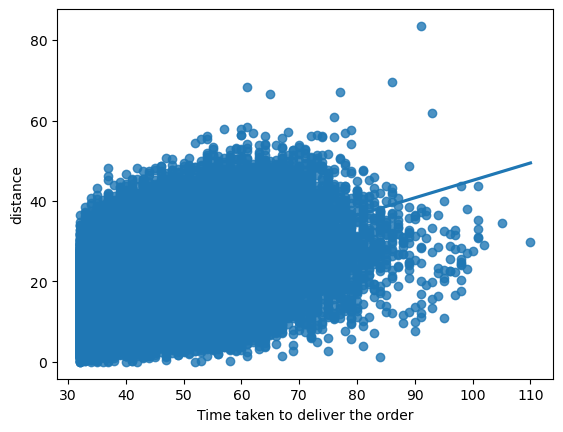

In [332]:
# Scatter plot to visualise the relationship between time_taken and other features
for i in numrical_cols[:-1]:
    sns.regplot(df_train, x='time_taken_mins', y=i)
    plt.xlabel('Time taken to deliver the order')
    plt.ylabel(i)
    plt.show()

In [568]:
numrical_cols

['subtotal',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance',
 'time_taken_mins']

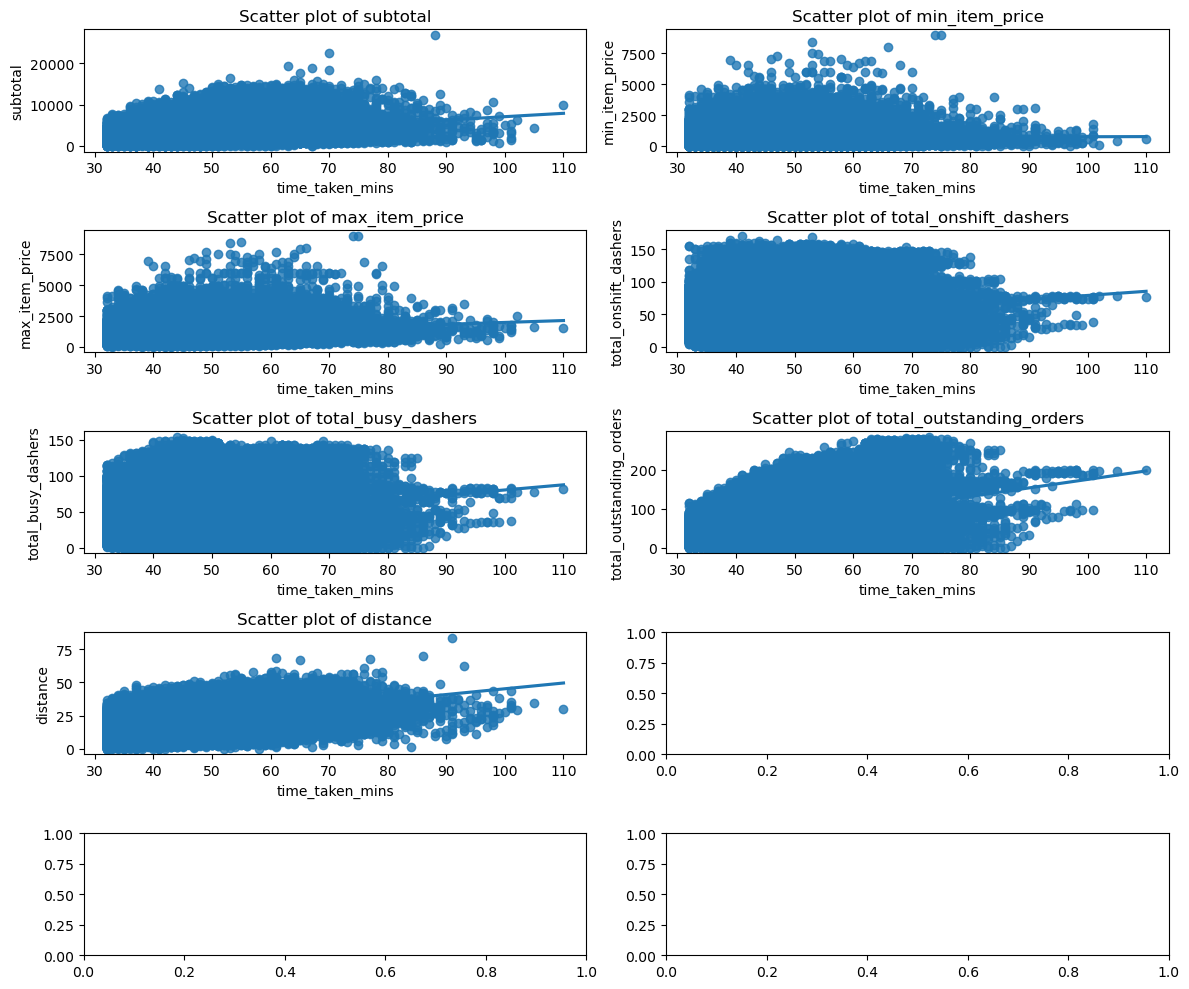

In [572]:
fig, ax = plt.subplots(5, 2, figsize=(12, 10))  # Increase figure size

for idx, col in enumerate(numrical_cols[:-1]):
    row, col_pos = divmod(idx, 2)  # Get row and column indices
    sns.regplot(data=df_train, x='time_taken_mins', y=col, ax=ax[row, col_pos])  # Assign ax
    ax[row, col_pos].set_title(f'Scatter plot of {col}')  # Correct title format

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

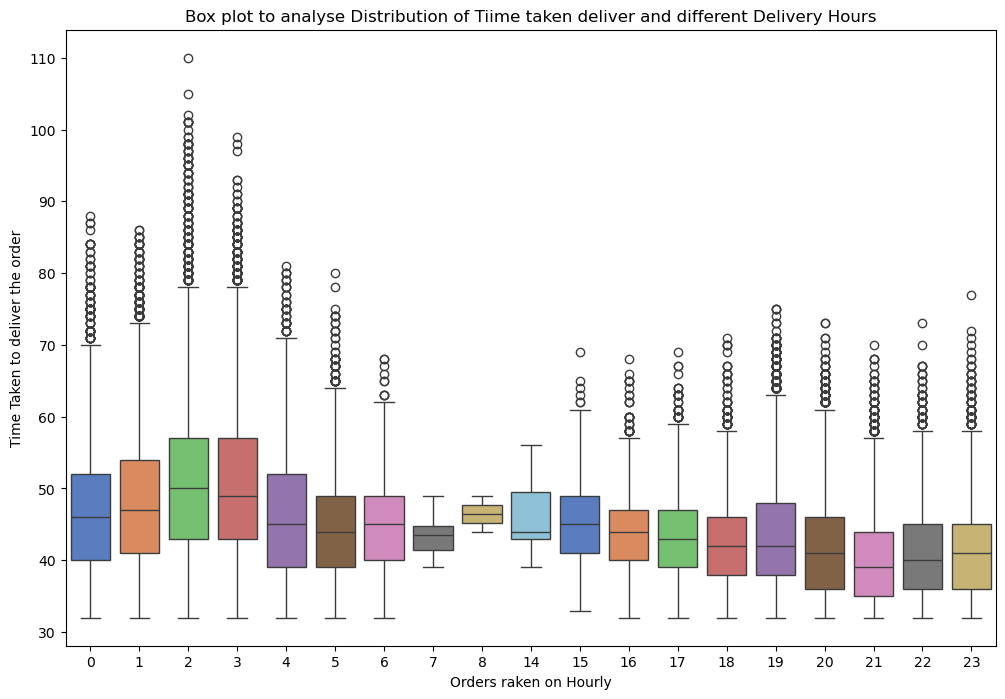

In [334]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12,8))
sns.boxplot(data=df_train,x='order_hour', y='time_taken_mins',palette='muted')
plt.xlabel('Orders raken on Hourly')
plt.ylabel('Time Taken to deliver the order')
plt.title('Box plot to analyse Distribution of Tiime taken deliver and different Delivery Hours')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

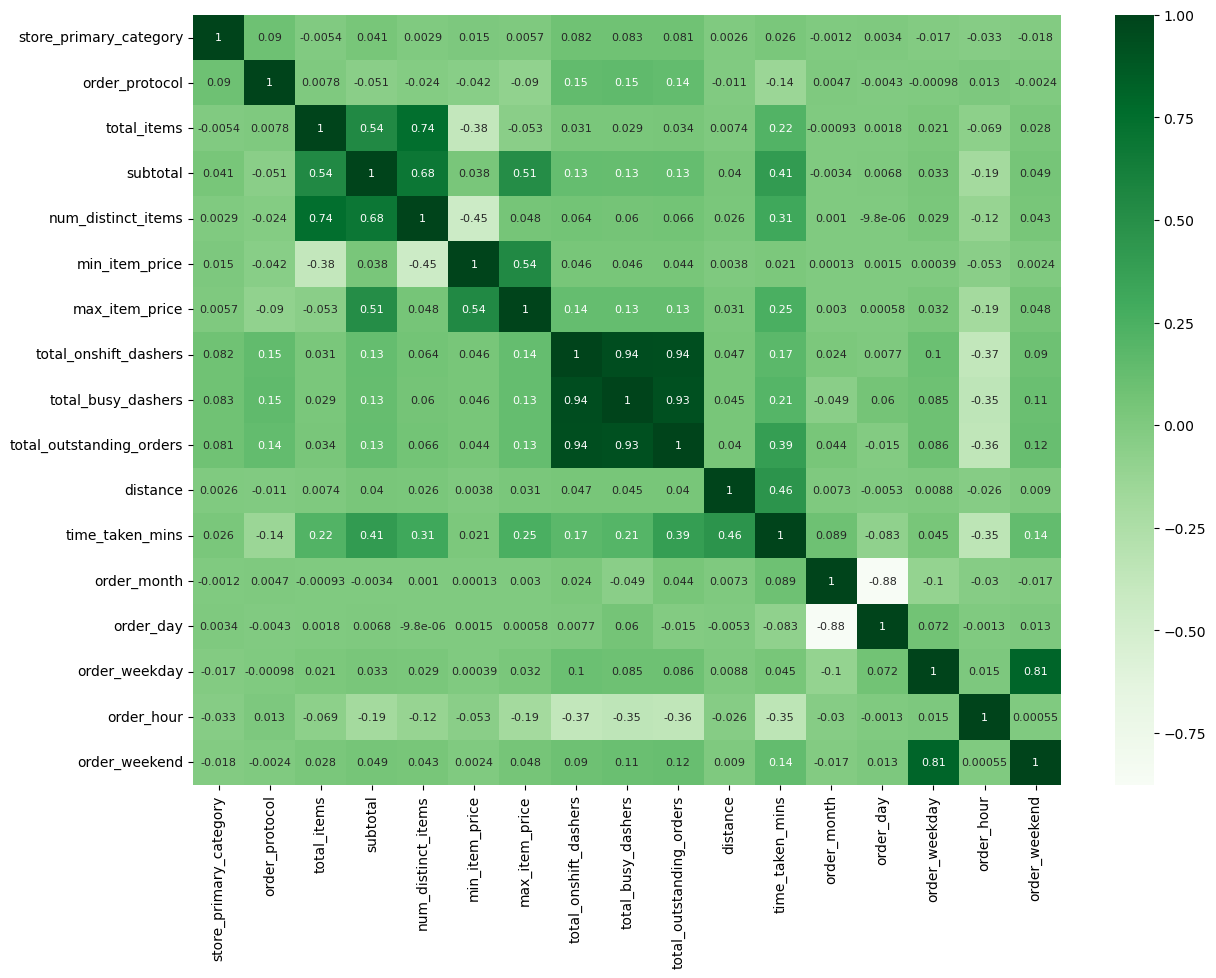

In [574]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens', annot_kws={"size": 8})

plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [110]:
correlated_cols = ['subtotal','total_outstanding_orders', 'distance', 'time_taken_mins']
correlated_cols2 = ['total_items', 'subtotal','num_distinct_items', 'max_item_price','total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken_mins','order_hour','order_weekend', 'order_weekday']
df_train_copy = df_train.copy()

In [112]:
df_train = df_train_copy.copy()

In [114]:
# Drop 3-5 weakly correlated columns from training dataset
df_train = df_train[correlated_cols2]
df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
102712            1       820                   1             745   
94576             1       995                   1             995   
49784             4      2040                   4             895   
37753             2      2376                   2            1399   
91728             1      1430                   1            1320   

        total_busy_dashers  total_outstanding_orders  distance  \
102712                  39                        56     30.32   
94576                   72                       116     31.16   
49784                    3                         7     18.16   
37753                   17                        19     33.44   
91728                   47                        52     31.56   

        time_taken_mins  order_hour  order_weekend  order_weekday  \
102712             45.0          21              0              1   
94576              43.0           2              0              4   
49784              46.0          21              0              4   
37753              51.0           3              0              1   
91728              37.0          21              0              4   

        delivery_hour  
102712             22  
94576               3  
49784              22  
37753               3  
91728              22

In [116]:
df_train.shape, df_train_copy.shape

((140621, 12), (140621, 22))

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [120]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'time_taken_mins', 'order_hour', 'order_weekend', 'order_weekday',
       'delivery_hour'],
      dtype='object')

In [71]:
df_train.total_items.value_counts().sort_index()

total_items
1      28470
2      39131
3      28132
4      18231
5      10072
6       6202
7       3580
8       2160
9       1335
10       885
11       596
12       471
13       290
14       235
15       169
16       143
17        91
18        85
19        47
20        47
21        34
22        26
23        15
24        23
25        22
26        23
27        11
28        14
29         9
30        14
31         5
32         4
33         3
34         7
35         7
36         4
37         1
38         1
39         3
40         2
41         2
42         5
44         1
45         1
47         1
48         4
49         1
56         1
57         1
59         1
64         1
66         1
411        1
Name: count, dtype: int64

In [73]:
df_train[df_train['total_items'] > 20].shape

(249, 11)

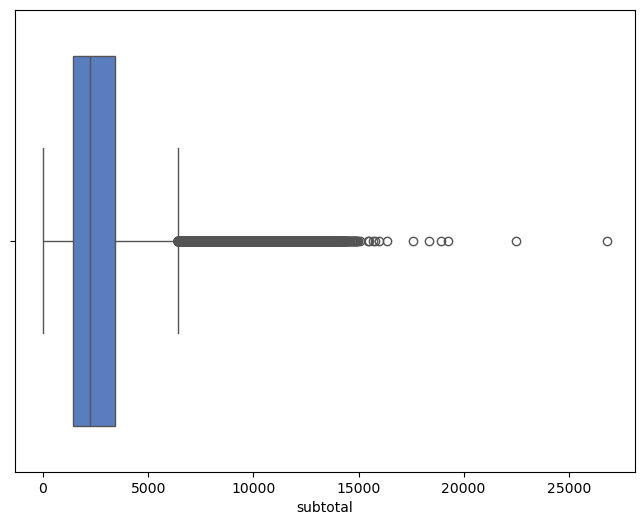

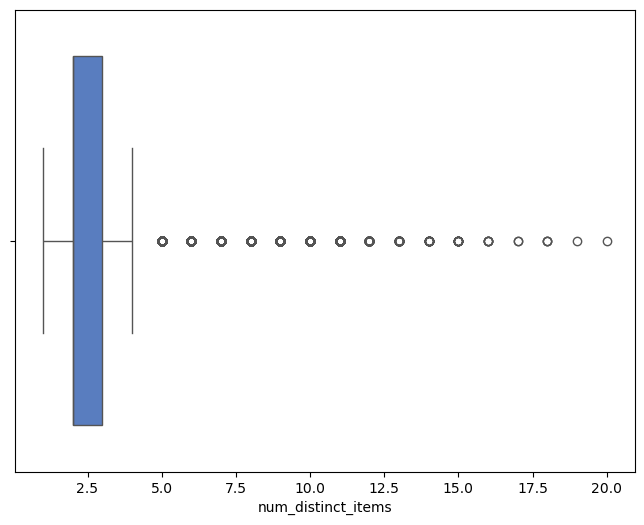

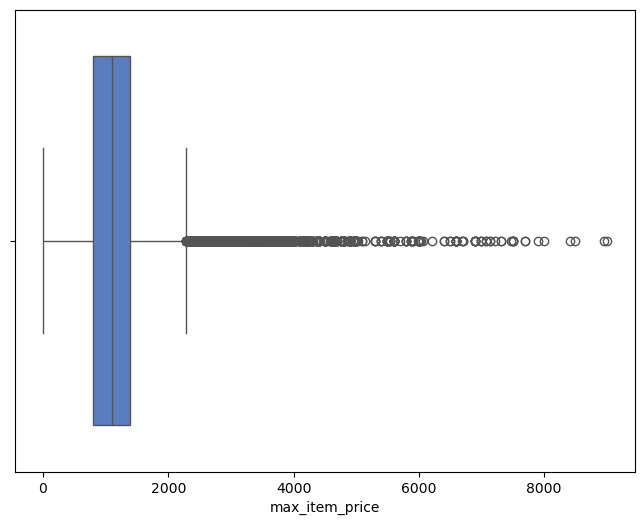

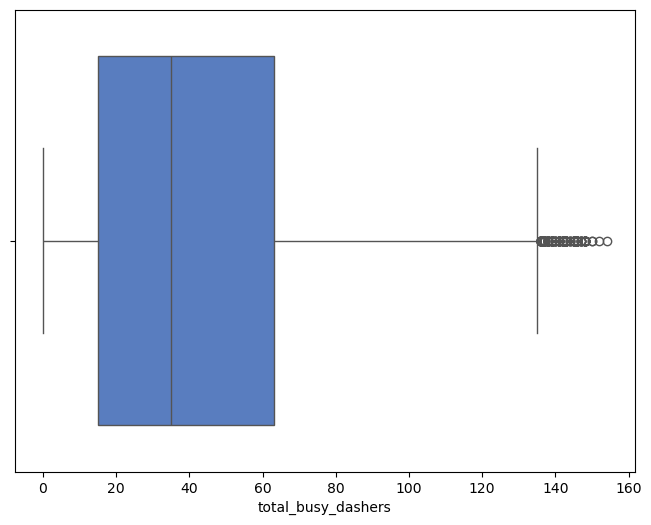

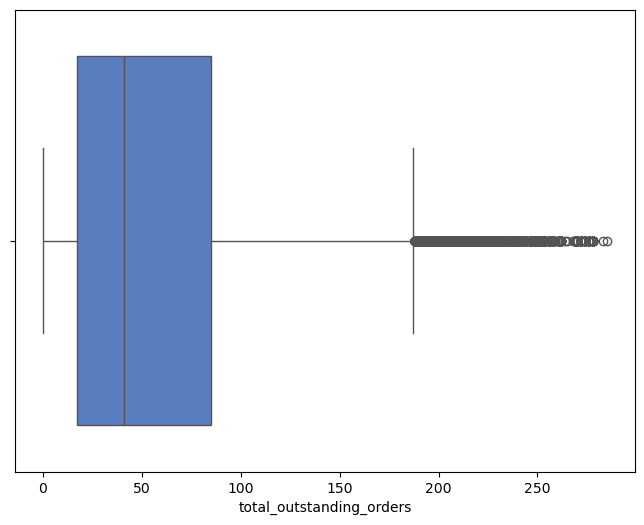

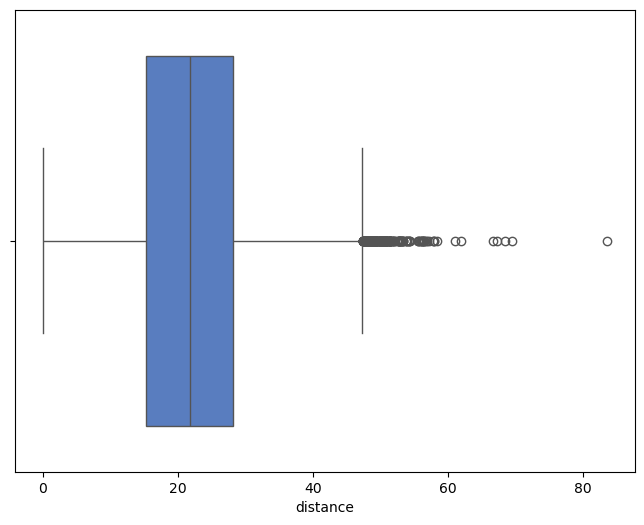

In [197]:
# Boxplot for time_taken
for i in ['subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance']:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df_train,x=i,palette='muted')
    # plt.xlabel('Orders raken on Hourly')
    # plt.ylabel('Time Taken to deliver the order')
    # plt.title('Box plot to analyse Distribution of Tiime taken deliver and different Delivery Hours')
    plt.show()

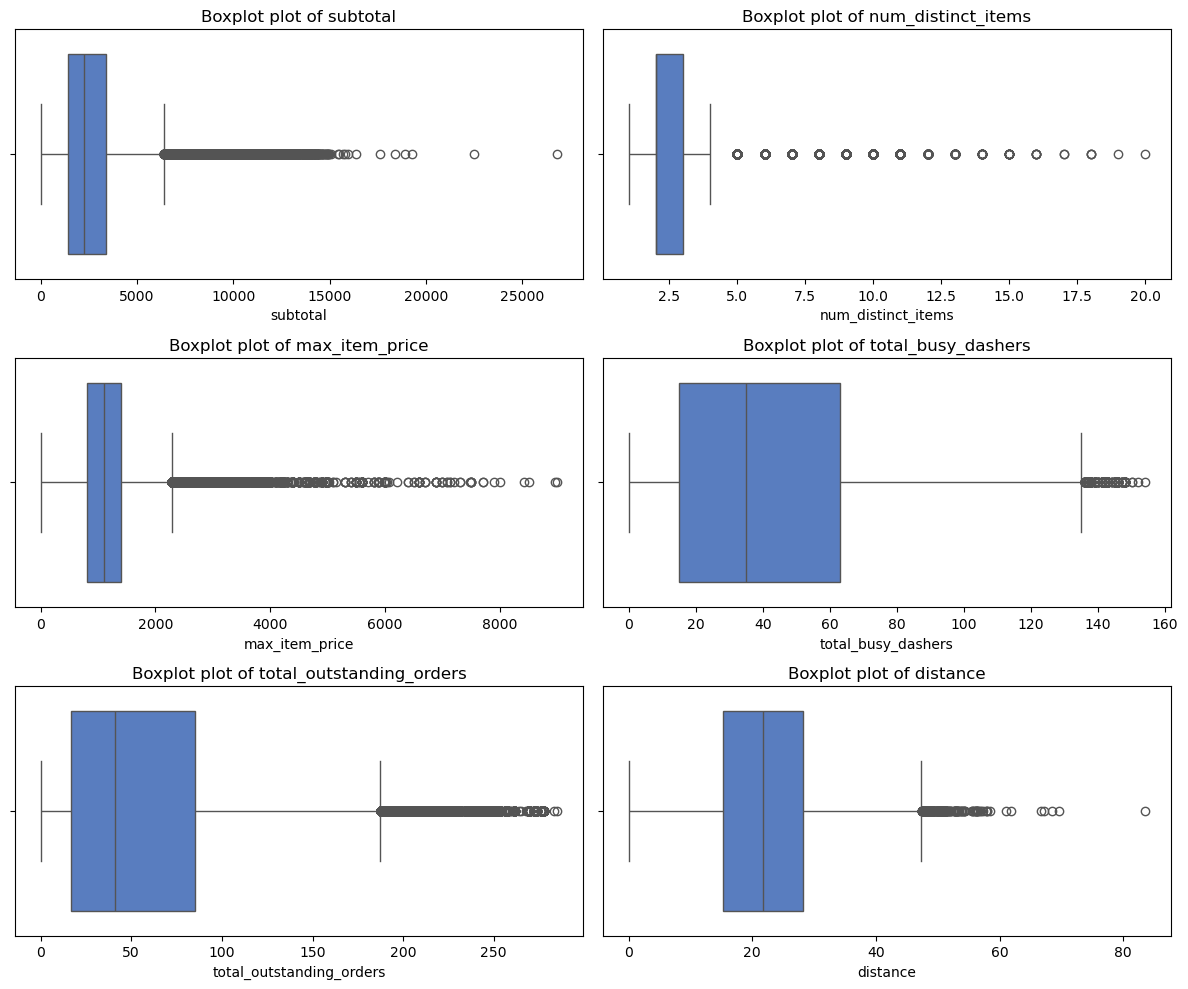

In [576]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))  # Increase figure size

for idx, col in enumerate(['subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance']):
    row, col_pos = divmod(idx, 2)  # Get row and column indices
    sns.boxplot(data=df_train, x=col, ax=ax[row, col_pos],palette='muted')  # Assign ax
    ax[row, col_pos].set_title(f'Boxplot plot of {col}')  # Correct title format

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

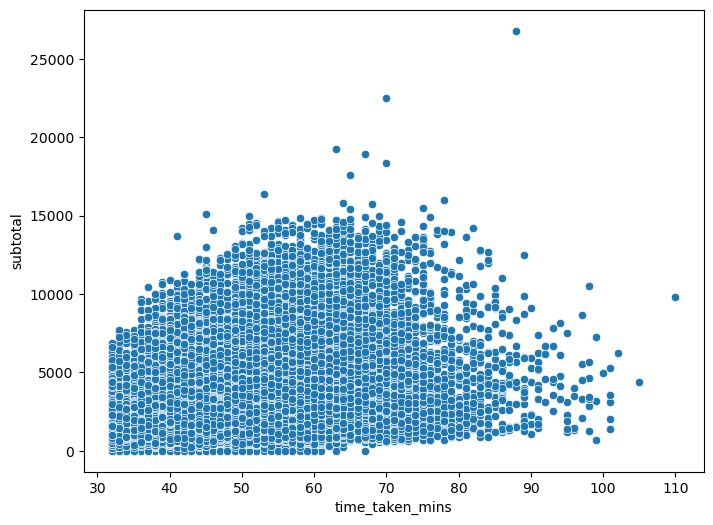

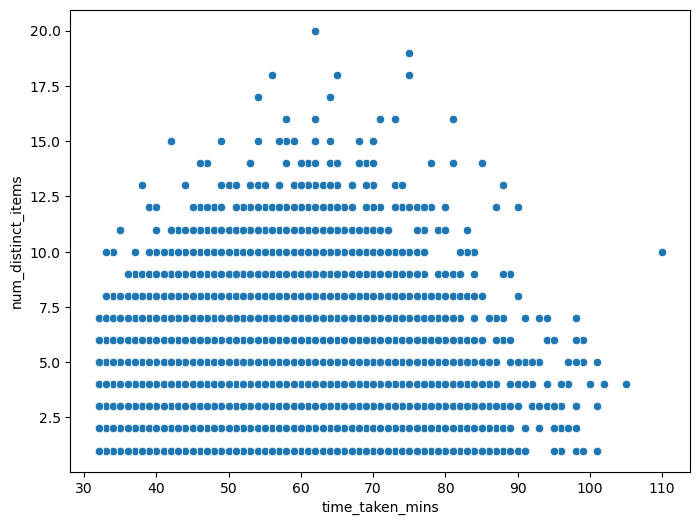

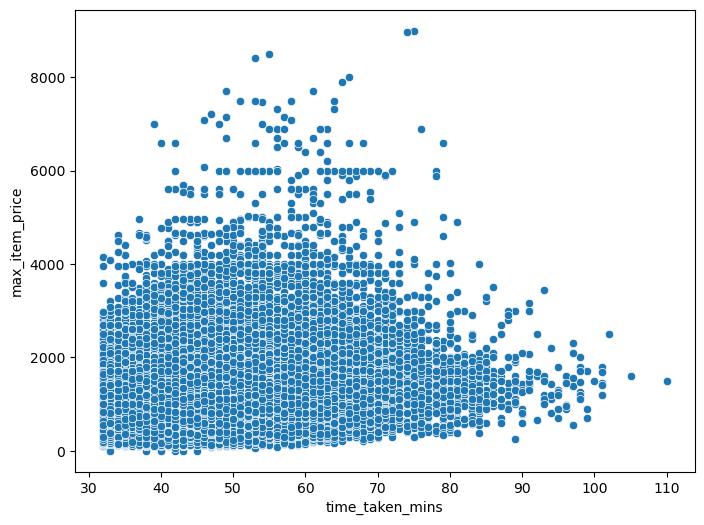

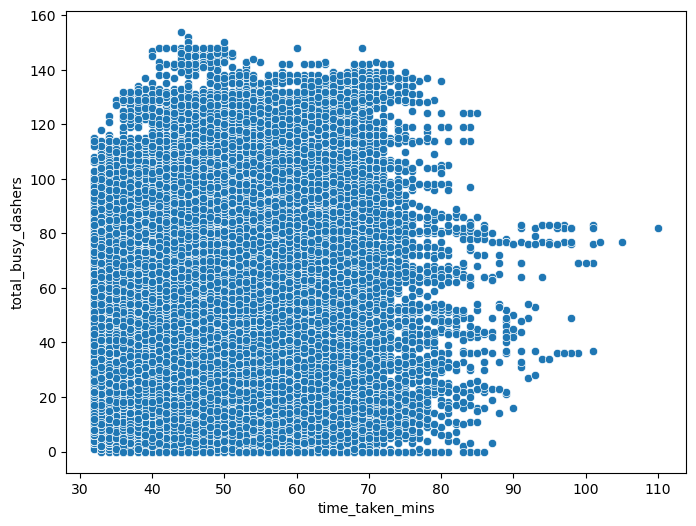

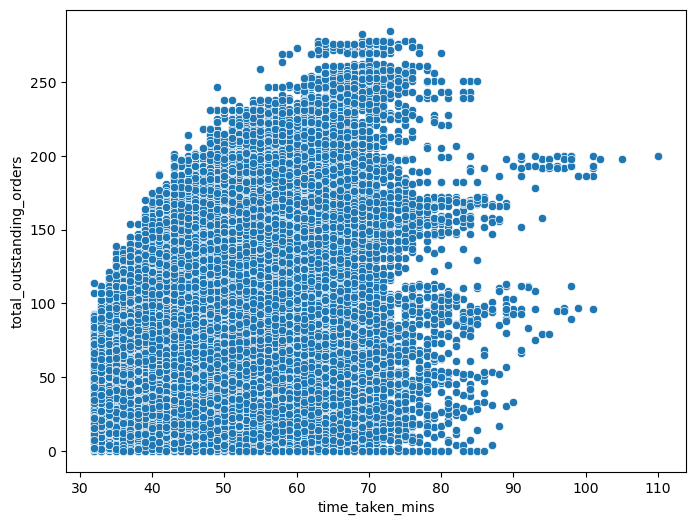

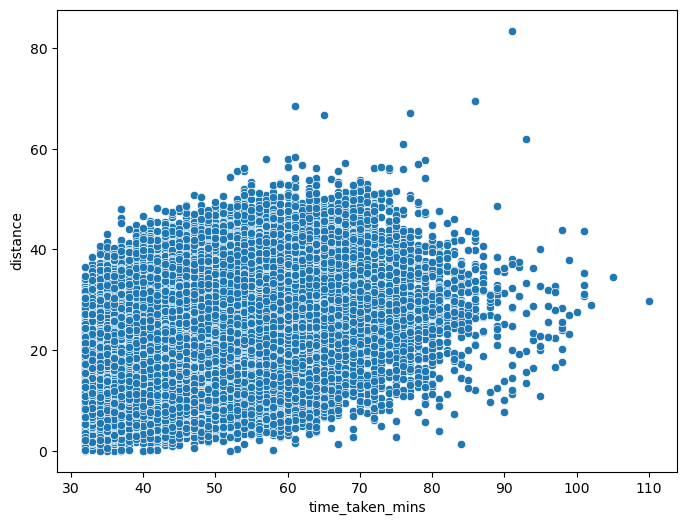

In [349]:
# Boxplot for time_taken
for i in ['subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance']:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_train,y=i, x='time_taken_mins',palette='muted')
    # plt.xlabel('Orders raken on Hourly')
    # plt.ylabel('Time Taken to deliver the order')
    # plt.title('Box plot to analyse Distribution of Tiime taken deliver and different Delivery Hours')
    plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

- Removing outlier for the where `total_items` are greater than 20
- considering where `subtotal` is lessthan 14000
- considering where `num_distinct_items` is lessthan 5
- considering where `max_item_price` is lessthan 6000
- considering where `total_busy_dashers` is lessthan 150 and greater than 0
- considering where `distance` is lessthan 60
- considering where `total_outstanding_orders` is lessthan 250 and greater than 0

In [580]:
# Handle outliers
df_train = df_train[df_train['total_items'] < 20]
df_train = df_train[df_train['subtotal'] < 14000]
df_train = df_train[df_train['num_distinct_items'] < 5]
df_train = df_train[df_train['max_item_price'] < 6000]
df_train = df_train[df_train['distance'] < 60]
df_train = df_train[(df_train['total_busy_dashers'] < 150) & (df_train['total_busy_dashers'] > 0)]
df_train = df_train[(df_train['total_outstanding_orders'] < 250) & (df_train['total_outstanding_orders'] > 0) ]
df_train.shape

(120499, 17)

#### Imputing zero values of below variables with mean.
- min_item_price
- total_onshift_dashers
- total_busy_dashers
- total_outstanding_orders
- distance

In [583]:
# df_train['min_item_price'] = np.where(df_train['min_item_price'] == 0, df_train['min_item_price'].mean(), df_train['min_item_price'])
# df_train['total_onshift_dashers'] = np.where(df_train['total_onshift_dashers'] == 0, df_train['total_onshift_dashers'].mean(), df_train['total_onshift_dashers'])
df_train['total_busy_dashers'] = np.where(df_train['total_busy_dashers'] == 0, df_train['total_busy_dashers'].mean(), df_train['total_busy_dashers'])
df_train['total_outstanding_orders'] = np.where(df_train['total_outstanding_orders'] == 0, df_train['total_outstanding_orders'].mean(), df_train['total_outstanding_orders'])
df_train['distance'] = np.where(df_train['distance'] == 0, df_train['distance'].mean(), df_train['distance'])

In [128]:
df_train.to_csv('training_dataset2.csv',index=False)
df_test.to_csv('testing_dataset2.csv', index=False)

In [130]:
# df_test.to_csv('testing_dataset.csv', index=False)

In [132]:
df_test.head()

store_primary_category  order_protocol  total_items  subtotal  \
50609                      39               1            4      2596   
49181                      25               3            3      3180   
4526                       46               1            1      1199   
131                        13               4            5      1590   
57096                      58               5            6      3680   

       num_distinct_items  min_item_price  max_item_price  \
50609                   4             299            1099   
49181                   2             580            1300   
4526                    1            1199            1199   
131                     4             200             440   
57096                   3             450             750   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
50609                     55                  52                        66   
49181                    101                  98                       192   
4526                       7                   6                         6   
131                        3                   4                         4   
57096                      9                   1                         1   

       distance  time_taken_mins  order_month  order_day  order_weekday  \
50609     28.32             50.0            2         18              2   
49181     23.56             69.0            2          9              0   
4526      14.60             41.0            1         30              4   
131       25.64             45.0            1         28              2   
57096     16.08             40.0            2          1              6   

       order_hour  order_weekend  delivery_month  delivery_day  \
50609           2              0               2            18   
49181           2              0               2             9   
4526            5              0               1            30   
131            22              0               1            28   
57096          19              1               2             1   

       delivery_weekday  delivery_hour  delivery_weekend  
50609                 2              3                 0  
49181                 0              4                 0  
4526                  4              6                 0  
131                   2             23                 0  
57096                 6             20                 1

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [135]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [309]:
df_train = pd.read_csv('training_dataset2.csv')
df_test = pd.read_csv('testing_dataset2.csv')
df_train.head(2)

total_items  subtotal  num_distinct_items  max_item_price  \
0            1       820                   1             745   
1            1       995                   1             995   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_mins  \
0                39.0                      56.0     30.32             45.0   
1                72.0                     116.0     31.16             43.0   

   order_hour  order_weekend  order_weekday  
0          21              0              1  
1           2              0              4

In [311]:
df_test.head(2)

store_primary_category  order_protocol  total_items  subtotal  \
0                      39               1            4      2596   
1                      25               3            3      3180   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             299            1099                     55   
1                   2             580            1300                    101   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_mins  \
0                  52                        66     28.32             50.0   
1                  98                       192     23.56             69.0   

   order_month  order_day  order_weekday  order_hour  order_weekend  
0            2         18              2           2              0  
1            2          9              0           2              0

In [313]:
df_train[['total_outstanding_orders','total_busy_dashers']].describe()

total_outstanding_orders  total_busy_dashers
count             120499.000000       120499.000000
mean                  58.309397           42.225205
std                   51.351338           31.481763
min                    1.000000            1.000000
25%                   18.000000           16.000000
50%                   42.000000           35.000000
75%                   84.000000           62.000000
max                  249.000000          148.000000

In [315]:
# Apply scaling to the numerical columns
scalar = MinMaxScaler()
df_train['ratio_outstn_by_busy_dashers'] = df_train['total_outstanding_orders']/df_train['total_busy_dashers']
df_train.drop(columns=['total_busy_dashers','total_outstanding_orders'], inplace=True)
# df_train[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']] = scalar.fit_transform(df_train[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']])
df_train[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']] = scalar.fit_transform(df_train[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']])
df_train['order_hour_bin'] = np.where(df_train['order_hour'].isin([8,9,10,11,12,13,14,15]), 0, 1)
df_train['total_items_bin'] = np.where(df_train['total_items'] >= 8, 0, 1)  

# df_train.head()
df_train.head(2)

total_items  subtotal  num_distinct_items  max_item_price  distance  \
0            1  0.058655                   1        0.124187  0.518849   
1            1  0.071173                   1        0.165861  0.533242   

   time_taken_mins  order_hour  order_weekend  order_weekday  \
0             45.0          21              0              1   
1             43.0           2              0              4   

   ratio_outstn_by_busy_dashers  order_hour_bin  total_items_bin  
0                      0.070192               1                1  
1                      0.078968               1                1

In [317]:
dummies = pd.get_dummies(df_train['num_distinct_items'],dtype=int,prefix='items_', drop_first=True)
df_train = pd.concat([df_train,dummies], axis=1)
dummies1 = pd.get_dummies(df_train['order_weekend'],dtype=int,prefix='weekend_', drop_first=True)
df_train = pd.concat([df_train,dummies1], axis=1)
dummies2 = pd.get_dummies(df_train['order_weekday'],dtype=int,prefix='weekday_', drop_first=True)
df_train = pd.concat([df_train,dummies2], axis=1)
df_train.head()

total_items  subtotal  num_distinct_items  max_item_price  distance  \
0            1  0.058655                   1        0.124187  0.518849   
1            1  0.071173                   1        0.165861  0.533242   
2            4  0.145923                   4        0.149192  0.310487   
3            2  0.169957                   2        0.233206  0.572310   
4            1  0.102289                   1        0.220037  0.540096   

   time_taken_mins  order_hour  order_weekend  order_weekday  \
0             45.0          21              0              1   
1             43.0           2              0              4   
2             46.0          21              0              4   
3             51.0           3              0              1   
4             37.0          21              0              4   

   ratio_outstn_by_busy_dashers  order_hour_bin  total_items_bin  items__2  \
0                      0.070192               1                1         0   
1                      0.078968               1                1         0   
2                      0.115141               1                1         0   
3                      0.054252               1                1         1   
4                      0.053688               1                1         0   

   items__3  items__4  weekend__1  weekday__1  weekday__2  weekday__3  \
0         0         0           0           1           0           0   
1         0         0           0           0           0           0   
2         0         1           0           0           0           0   
3         0         0           0           1           0           0   
4         0         0           0           0           0           0   

   weekday__4  weekday__5  weekday__6  
0           0           0           0  
1           1           0           0  
2           1           0           0  
3           0           0           0  
4           1           0           0

In [319]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'time_taken_mins', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'order_hour_bin',
       'total_items_bin', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6'],
      dtype='object')

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [323]:
# Create/Initialise the model
# Model_1:
X = df_train[['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'order_hour_bin',
       'total_items_bin', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6']]
y = df_train['time_taken_mins']
X = sm.add_constant(X)
lr_m1 = sm.OLS(y,X).fit()
print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:10:52   Log-Likelihood:            -3.7499e+05
No. Observations:              120499   AIC:                         7.500e+05
Df Residuals:                  120481   BIC:                         7.502e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [327]:
# Model_2:
X = df_train[['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'total_items_bin', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6']]
y = df_train['time_taken_mins']
X = sm.add_constant(X)
lr_m2 = sm.OLS(y,X).fit()
print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.264e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:11:00   Log-Likelihood:            -3.7499e+05
No. Observations:              120499   AIC:                         7.500e+05
Df Residuals:                  120482   BIC:                         7.502e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [329]:
# Train the model using the training data
# Model_3:
X = df_train[['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6']]
y = df_train['time_taken_mins']
X = sm.add_constant(X)
lr_m3 = sm.OLS(y,X).fit()
print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                 1.348e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:11:01   Log-Likelihood:            -3.7500e+05
No. Observations:              120499   AIC:                         7.500e+05
Df Residuals:                  120483   BIC:                         7.502e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [355]:
# Model_4:
X = df_train[['total_items', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6']]
y = df_train['time_taken_mins']
X = sm.add_constant(X)
lr_m4 = sm.OLS(y,X).fit()
print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                 1.374e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:13:29   Log-Likelihood:            -3.7687e+05
No. Observations:              120499   AIC:                         7.538e+05
Df Residuals:                  120484   BIC:                         7.539e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [331]:
df_test_copy = df_test.copy()

In [357]:
df_test = df_test_copy.copy()
df_test.head()

store_primary_category  order_protocol  total_items  subtotal  \
0                      39               1            4      2596   
1                      25               3            3      3180   
2                      46               1            1      1199   
3                      13               4            5      1590   
4                      58               5            6      3680   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             299            1099                     55   
1                   2             580            1300                    101   
2                   1            1199            1199                      7   
3                   4             200             440                      3   
4                   3             450             750                      9   

   total_busy_dashers  total_outstanding_orders  distance  time_taken_mins  \
0                  52                        66     28.32             50.0   
1                  98                       192     23.56             69.0   
2                   6                         6     14.60             41.0   
3                   4                         4     25.64             45.0   
4                   1                         1     16.08             40.0   

   order_month  order_day  order_weekday  order_hour  order_weekend  
0            2         18              2           2              0  
1            2          9              0           2              0  
2            1         30              4           5              0  
3            1         28              2          22              0  
4            2          1              6          19              1

In [363]:
# Preprocessing df_test for Prediction
# Apply scaling to the numerical columns
# scalar = MinMaxScaler()

df_test = df_test[df_test['total_items'] < 20]
df_test = df_test[df_test['subtotal'] < 14000]
df_test = df_test[df_test['num_distinct_items'] < 5]
df_test = df_test[df_test['max_item_price'] < 6000]
df_test = df_test[df_test['distance'] < 60]
df_test = df_test[(df_test['total_busy_dashers'] < 150) & (df_test['total_busy_dashers'] > 0)]
df_test = df_test[(df_test['total_outstanding_orders'] < 250) & (df_test['total_outstanding_orders'] > 0) ]

# df_train = df_train[df_train['total_items'] < 20]
# df_train = df_train[df_train['subtotal'] < 14000]
# df_train = df_train[df_train['num_distinct_items'] < 5]
# df_train = df_train[df_train['max_item_price'] < 6000]
# df_train = df_train[df_train['distance'] < 60]
# df_train = df_train[(df_train['total_busy_dashers'] < 150) & (df_train['total_busy_dashers'] > 0)]
# df_train = df_train[(df_train['total_outstanding_orders'] < 250) & (df_train['total_outstanding_orders'] > 0) ]


df_test['total_busy_dashers'] = np.where(df_test['total_busy_dashers'] == 0, df_test['total_busy_dashers'].mean(), df_test['total_busy_dashers'])
df_test['total_outstanding_orders'] = np.where(df_test['total_outstanding_orders'] == 0, df_test['total_outstanding_orders'].mean(), df_test['total_outstanding_orders'])
df_test['distance'] = np.where(df_test['distance'] == 0, df_test['distance'].mean(), df_test['distance'])

# df_test[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']] = scalar.transform(df_test[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']])
# df_test['order_hour_bin'] = np.where(df_test['order_hour'].isin([8,9,10,11,12,13,14,15]), 0, 1)
# df_test['total_items_bin'] = np.where(df_test['total_items'] >= 8, 0, 1)  
# dummies = pd.get_dummies(df_test['num_distinct_items'],dtype=int,prefix='items_', drop_first=True)
# df_test = pd.concat([df_test,dummies], axis=1)

df_test['ratio_outstn_by_busy_dashers'] = df_test['total_outstanding_orders']/df_test['total_busy_dashers']
df_test.drop(columns=['total_busy_dashers','total_outstanding_orders'], inplace=True)
# df_test[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']] = scalar.fit_transform(df_test[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']])
df_test[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']] = scalar.transform(df_test[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']])
df_test['order_hour_bin'] = np.where(df_test['order_hour'].isin([8,9,10,11,12,13,14,15]), 0, 1)
df_test['total_items_bin'] = np.where(df_test['total_items'] >= 8, 0, 1)  

dummies = pd.get_dummies(df_test['num_distinct_items'],dtype=int,prefix='items_', drop_first=True)
df_test = pd.concat([df_test,dummies], axis=1)
dummies1 = pd.get_dummies(df_test['order_weekend'],dtype=int,prefix='weekend_', drop_first=True)
df_test = pd.concat([df_test,dummies1], axis=1)
dummies2 = pd.get_dummies(df_test['order_weekday'],dtype=int,prefix='weekday_', drop_first=True)
df_test = pd.concat([df_test,dummies2], axis=1)


df_test.head()

store_primary_category  order_protocol  total_items  subtotal  \
0                      39               1            4  0.185694   
1                      25               3            3  0.227468   
2                      46               1            1  0.085765   
3                      13               4            5  0.113734   
4                      58               5            6  0.263233   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             299        0.183197                     55   
1                   2             580        0.216703                    101   
2                   1            1199        0.199867                      7   
3                   4             200        0.073346                      3   
4                   3             450        0.125021                      9   

   distance  time_taken_mins  order_month  order_day  order_weekday  \
0  0.484578             50.0            2         18              2   
1  0.403016             69.0            2          9              0   
2  0.249486             41.0            1         30              4   
3  0.438657             45.0            1         28              2   
4  0.274846             40.0            2          1              6   

   order_hour  order_weekend  ratio_outstn_by_busy_dashers  order_hour_bin  \
0           2              0                      0.061844               1   
1           2              0                      0.096401               1   
2           5              0                      0.048359               1   
3          22              0                      0.048359               1   
4          19              1                      0.048359               1   

   total_items_bin  items__2  items__3  items__4  weekend__1  weekday__1  \
0                1         0         0         1           0           0   
1                1         1         0         0           0           0   
2                1         0         0         0           0           0   
3                1         0         0         1           0           0   
4                1         0         1         0           1           0   

   weekday__2  weekday__3  weekday__4  weekday__5  weekday__6  
0           1           0           0           0           0  
1           0           0           0           0           0  
2           0           0           1           0           0  
3           1           0           0           0           0  
4           0           0           0           0           1

In [369]:
# Make predictions
# X_test = sm.add_constant(X_test)
independet_cols = ['total_items', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend',
       'order_weekday', 'ratio_outstn_by_busy_dashers', 'items__2', 'items__3', 'items__4', 'weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6']

X_test = df_test[independet_cols]
y_test = df_test['time_taken_mins']
X_test = sm.add_constant(X_test)
y_pred = lr_m4.predict(X_test)
x_train_pred = lr_m4.predict(X)


In [371]:
# Find results for evaluation metrics
print('Test Mean Squared error:' ,mean_squared_error(y_test, y_pred))
print('Test R2 Squared error:' ,r2_score(y_test, y_pred))
print('Train Mean Squared error:' ,mean_squared_error(y, x_train_pred))
print('Train R2 Squared error:' ,r2_score(y, x_train_pred))


Test Mean Squared error: 30.94905601624566
Test R2 Squared error: 0.6130249711172175
Train Mean Squared error: 30.487476550709285
Train R2 Squared error: 0.6148583460273751


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [373]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [375]:
df_train_copy2 = df_train.copy()

In [377]:
df_train_copy2.head()

total_items  subtotal  num_distinct_items  max_item_price  distance  \
0            1  0.058655                   1        0.124187  0.518849   
1            1  0.071173                   1        0.165861  0.533242   
2            4  0.145923                   4        0.149192  0.310487   
3            2  0.169957                   2        0.233206  0.572310   
4            1  0.102289                   1        0.220037  0.540096   

   time_taken_mins  order_hour  order_weekend  order_weekday  \
0             45.0          21              0              1   
1             43.0           2              0              4   
2             46.0          21              0              4   
3             51.0           3              0              1   
4             37.0          21              0              4   

   ratio_outstn_by_busy_dashers  order_hour_bin  total_items_bin  items__2  \
0                      0.070192               1                1         0   
1                      0.078968               1                1         0   
2                      0.115141               1                1         0   
3                      0.054252               1                1         1   
4                      0.053688               1                1         0   

   items__3  items__4  weekend__1  weekday__1  weekday__2  weekday__3  \
0         0         0           0           1           0           0   
1         0         0           0           0           0           0   
2         0         1           0           0           0           0   
3         0         0           0           1           0           0   
4         0         0           0           0           0           0   

   weekday__4  weekday__5  weekday__6  
0           0           0           0  
1           1           0           0  
2           1           0           0  
3           0           0           0  
4           1           0           0

In [379]:
df_train = df_train_copy2.copy()

In [381]:
y = df_train['time_taken_mins']
# df_train.drop(columns=['total_outstanding_orders','total_busy_dashers','time_taken_mins'], inplace=True)
# df_train.reset_index(drop=True,inplace=True)
df_train.drop(columns='time_taken_mins',inplace=True)

In [383]:
# Loop through the number of features and test the model
vif = pd.DataFrame()
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features      VIF
20                    weekday__6      inf
19                    weekday__5      inf
18                    weekday__4      inf
17                    weekday__3      inf
6                  order_weekend      inf
7                  order_weekday      inf
16                    weekday__2      inf
15                    weekday__1      inf
14                    weekend__1      inf
2             num_distinct_items  4689.83
13                      items__4   924.52
12                      items__3   739.63
11                      items__2   263.02
0                    total_items     5.22
1                       subtotal     3.25
3                 max_item_price     2.31
10               total_items_bin     1.83
5                     order_hour     1.10
8   ratio_outstn_by_busy_dashers     1.05
9                 order_hour_bin     1.00
4                       distance     1.00

In [385]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['num_distinct_items','weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:17:52   Log-Likelihood:            -3.7619e+05
No. Observations:              120499   AIC:                         7.524e+05
Df Residuals:                  120485   BIC:                         7.525e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [387]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend', 'order_weekday',
       'ratio_outstn_by_busy_dashers', 'order_hour_bin', 'total_items_bin',
       'items__2', 'items__3', 'items__4', 'weekend__1', 'weekday__1',
       'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [391]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['total_items_bin','order_hour_bin','weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:18:45   Log-Likelihood:            -3.7619e+05
No. Observations:              120499   AIC:                         7.524e+05
Df Residuals:                  120487   BIC:                         7.525e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [393]:
df_train.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'distance', 'order_hour', 'order_weekend', 'order_weekday',
       'ratio_outstn_by_busy_dashers', 'order_hour_bin', 'total_items_bin',
       'items__2', 'items__3', 'items__4', 'weekend__1', 'weekday__1',
       'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5', 'weekday__6'],
      dtype='object')

In [395]:
vif = pd.DataFrame()
df_train = df_train.drop(columns=['num_distinct_items','total_items_bin','order_hour_bin','weekend__1',
       'weekday__1', 'weekday__2', 'weekday__3', 'weekday__4', 'weekday__5',
       'weekday__6'])
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
1                       subtotal  12.16
0                    total_items  10.69
2                 max_item_price  10.25
6                  order_weekday   9.01
7   ratio_outstn_by_busy_dashers   7.60
3                       distance   5.99
5                  order_weekend   4.18
10                      items__4   3.26
9                       items__3   3.21
8                       items__2   2.58
4                     order_hour   1.90

In [397]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['total_items'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 1.959e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:19:28   Log-Likelihood:            -3.7619e+05
No. Observations:              120499   AIC:                         7.524e+05
Df Residuals:                  120488   BIC:                         7.525e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [399]:
X.columns

Index(['const', 'subtotal', 'max_item_price', 'distance', 'order_hour',
       'order_weekend', 'order_weekday', 'ratio_outstn_by_busy_dashers',
       'items__2', 'items__3', 'items__4'],
      dtype='object')

In [401]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='total_items')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0                      subtotal  9.97
1                max_item_price  9.04
5                 order_weekday  8.89
6  ratio_outstn_by_busy_dashers  7.18
2                      distance  5.86
4                 order_weekend  4.15
8                      items__3  2.34
7                      items__2  2.24
9                      items__4  2.20
3                    order_hour  1.85

In [403]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['items__2'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                 2.175e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:19:52   Log-Likelihood:            -3.7622e+05
No. Observations:              120499   AIC:                         7.525e+05
Df Residuals:                  120489   BIC:                         7.526e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [405]:
vif = pd.DataFrame()
df_train = df_train.drop(columns=['items__2'])
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                      subtotal  9.17
1                max_item_price  8.88
5                 order_weekday  8.82
6  ratio_outstn_by_busy_dashers  6.87
2                      distance  5.76
4                 order_weekend  4.15
3                    order_hour  1.84
8                      items__4  1.71
7                      items__3  1.67

In [407]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['max_item_price'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 2.434e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:20:04   Log-Likelihood:            -3.7642e+05
No. Observations:              120499   AIC:                         7.529e+05
Df Residuals:                  120490   BIC:                         7.529e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [409]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='max_item_price')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                 order_weekday  8.73
5  ratio_outstn_by_busy_dashers  6.45
1                      distance  5.62
0                      subtotal  4.91
3                 order_weekend  4.14
2                    order_hour  1.84
6                      items__3  1.57
7                      items__4  1.52

In [411]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['items__4'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                 2.775e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:20:14   Log-Likelihood:            -3.7651e+05
No. Observations:              120499   AIC:                         7.530e+05
Df Residuals:                  120491   BIC:                         7.531e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [413]:
df_train.head()

subtotal  distance  order_hour  order_weekend  order_weekday  \
0  0.058655  0.518849          21              0              1   
1  0.071173  0.533242           2              0              4   
2  0.145923  0.310487          21              0              4   
3  0.169957  0.572310           3              0              1   
4  0.102289  0.540096          21              0              4   

   ratio_outstn_by_busy_dashers  items__3  items__4  
0                      0.070192         0         0  
1                      0.078968         0         0  
2                      0.115141         0         1  
3                      0.054252         0         0  
4                      0.053688         0         0

In [415]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='items__4')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                 order_weekday  8.73
5  ratio_outstn_by_busy_dashers  6.44
1                      distance  5.62
3                 order_weekend  4.13
0                      subtotal  3.92
2                    order_hour  1.84
6                      items__3  1.39

In [417]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['items__3'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                 3.237e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:20:24   Log-Likelihood:            -3.7652e+05
No. Observations:              120499   AIC:                         7.531e+05
Df Residuals:                  120492   BIC:                         7.531e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [419]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='items__3')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                 order_weekday  8.72
5  ratio_outstn_by_busy_dashers  6.43
1                      distance  5.62
3                 order_weekend  4.13
0                      subtotal  3.69
2                    order_hour  1.84

In [421]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['order_weekday'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 3.790e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:20:29   Log-Likelihood:            -3.7742e+05
No. Observations:              120499   AIC:                         7.549e+05
Df Residuals:                  120493   BIC:                         7.549e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [423]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='order_weekday')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4  ratio_outstn_by_busy_dashers  5.97
1                      distance  5.39
0                      subtotal  3.63
2                    order_hour  1.78
3                 order_weekend  1.51

In [425]:
independet_cols = df_train.columns
independet_cols = independet_cols.drop(['order_weekend'])
X = df_train[independet_cols]

X = sm.add_constant(X)
lr_rfe1 = sm.OLS(y,X).fit()
print(lr_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:        time_taken_mins   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 4.493e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:20:37   Log-Likelihood:            -3.7936e+05
No. Observations:              120499   AIC:                         7.587e+05
Df Residuals:                  120494   BIC:                         7.588e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [427]:
vif = pd.DataFrame()
df_train = df_train.drop(columns='order_weekend')
vif['Features'] = df_train.columns
vif['VIF'] = [variance_inflation_factor(df_train.values, i) for i in range(df_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3  ratio_outstn_by_busy_dashers  5.88
1                      distance  5.36
0                      subtotal  3.58
2                    order_hour  1.77

In [429]:
independet_cols

Index(['subtotal', 'distance', 'order_hour', 'ratio_outstn_by_busy_dashers'], dtype='object')

In [431]:
final_columns = ['order_weekend','subtotal', 'distance', 'order_hour', 'ratio_outstn_by_busy_dashers','time_taken_mins']

In [433]:
df_train = df_train_copy2.copy()
df_train[final_columns].shape

(120499, 6)

In [435]:
df_train['time_taken_mins'].shape

(120499,)

#### Test Set Preprocessing

In [438]:
df_test.head(2)

store_primary_category  order_protocol  total_items  subtotal  \
0                      39               1            4  0.185694   
1                      25               3            3  0.227468   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             299        0.183197                     55   
1                   2             580        0.216703                    101   

   distance  time_taken_mins  order_month  order_day  order_weekday  \
0  0.484578             50.0            2         18              2   
1  0.403016             69.0            2          9              0   

   order_hour  order_weekend  ratio_outstn_by_busy_dashers  order_hour_bin  \
0           2              0                      0.061844               1   
1           2              0                      0.096401               1   

   total_items_bin  items__2  items__3  items__4  weekend__1  weekday__1  \
0                1         0         0         1           0           0   
1                1         1         0         0           0           0   

   weekday__2  weekday__3  weekday__4  weekday__5  weekday__6  
0           1           0           0           0           0  
1           0           0           0           0           0

In [440]:
df_test_copy = df_test.copy()

- Same Preprocessing steps are followed for the Test Data set
>(684.9696319768798,
 44.91910773309363,
 41.861813547847554,
 58.23140115032115,
 21.843089596477352)

In [293]:
# Preprocessing df_test for Prediction
# Apply scaling to the numerical columns
# scalar = MinMaxScaler()

# df_test = df_test[df_test['total_items'] < 20]
# df_test = df_test[df_test['subtotal'] < 14000]
# df_test = df_test[df_test['num_distinct_items'] < 5]
# df_test = df_test[df_test['max_item_price'] < 6000]
# df_test = df_test[df_test['distance'] < 60]
# df_test = df_test[(df_test['total_busy_dashers'] < 150) & (df_test['total_busy_dashers'] > 0)]
# df_test = df_test[(df_test['total_outstanding_orders'] < 250) & (df_test['total_outstanding_orders'] > 0) ]

# # df_test['total_busy_dashers'] = np.where(df_test['total_busy_dashers'] == 0, df_test['total_busy_dashers'].mean(), df_test['total_busy_dashers'])
# # df_test['total_outstanding_orders'] = np.where(df_test['total_outstanding_orders'] == 0, df_test['total_outstanding_orders'].mean(), df_test['total_outstanding_orders'])
# # df_test['distance'] = np.where(df_test['distance'] == 0, df_test['distance'].mean(), df_test['distance'])

# df_test['total_busy_dashers'] = np.where(df_test['total_busy_dashers'] == 0, 41.861813547847554, df_test['total_busy_dashers'])
# df_test['total_outstanding_orders'] = np.where(df_test['total_outstanding_orders'] == 0, 58.23140115032115, df_test['total_outstanding_orders'])
# df_test['distance'] = np.where(df_test['distance'] == 0, 21.843089596477352, df_test['distance'])

# df_test['ratio_outstn_by_busy_dashers'] = df_test['total_outstanding_orders']/df_test['total_busy_dashers']
# df_test.drop(columns=['total_busy_dashers','total_outstanding_orders'], inplace=True)
# # df_train[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']] = scalar.fit_transform(df_train[['subtotal','max_item_price','total_busy_dashers','total_outstanding_orders','distance']])
# df_test[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']] = scalar.transform(df_test[['subtotal','max_item_price','ratio_outstn_by_busy_dashers','distance']])
# # df_test['order_hour_bin'] = np.where(df_test['order_hour'].isin([8,9,10,11,12,13,14,15]), 0, 1)
# # df_test['total_items_bin'] = np.where(df_test['total_items'] >= 8, 0, 1)  
# df_test.head()

In [442]:
df_test[final_columns].shape

(30183, 6)

In [444]:
target_column = "time_taken_mins" 


X_train = df_train[final_columns].drop(columns=[target_column])  # Features
y_train = df_train[target_column]  # Target

# Split df_test into X_test and y_test
X_test = df_test[final_columns].drop(columns=[target_column])  # Features
y_test = df_test[target_column]  # Target

In [446]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((120499, 5), (30183, 5), (120499,), (30183,))

In [448]:
# Build the final model with selected number of features
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [484]:
for i in lr.coef_:
    print(round(i,6))

print(round(lr.intercept_,6))

2.120989
22.430063
27.029361
-0.197144
198.1018
19.754152


In [452]:
y_pred = lr.predict(X_test)

In [454]:
print('Test Mean Squared error:' ,mean_squared_error(y_test, y_pred))
print('Test R2 Squared error:' ,r2_score(y_test, y_pred))

Test Mean Squared error: 31.095286421888378
Test R2 Squared error: 0.6111965626702061


In [335]:
print('Test Mean Squared error:' ,mean_squared_error(y_test, y_pred))
print('Test R2 Squared error:' ,r2_score(y_test, y_pred))

Test Mean Squared error: 31.09528904450732
Test R2 Squared error: 0.611196529877993


In [456]:
x_train_pred = lr.predict(X_train)

In [458]:
print('Train Mean Squared error:' ,mean_squared_error(y_train, x_train_pred))
print('Train R2 Squared error:' ,r2_score(y_train, x_train_pred))

Train Mean Squared error: 30.768143273233363
Train R2 Squared error: 0.6113127444244283


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

<Axes: xlabel='time_taken_mins', ylabel='Density'>

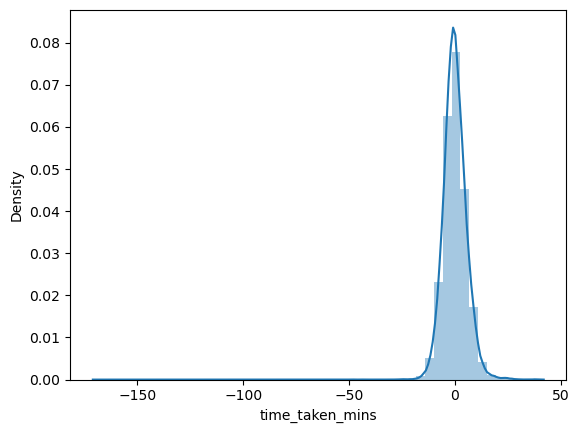

In [460]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
res = y_train - x_train_pred
sns.distplot(res)


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


#### Final model euation is 
Y[t) = 2.120989 * 'order_weekend'+ 22.430063 * 'subtotal' + 27.029361 * 'distance' + -0.197144 * 'order_hour' + 198.1018 * 'ratio_outstn_by_busy_dashers' +
19.754152

In [596]:
print("Feature Min Values:", scalar.data_min_)
print("Feature Max Values:", scalar.data_max_)

Feature Min Values: [0.         0.         0.03448276 0.04      ]
Feature Max Values: [13980.   5999.     20.     58.4]


In [592]:
# Compare the scaled vs unscaled features used in the final model


array([13980.        ,  5999.        ,    19.96551724,    58.36      ])

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**


In the given dataset we have below categorical variables. Among them `'order_weekend','order_hour'` has significant effent on the dependent variable
- 'store_primary_category',
- 'order_protocol',
- 'total_items',
- 'num_distinct_items',
- 'order_month',
- 'order_day',
- 'order_weekday',
- 'order_hour',
- 'order_weekend'
> Ordering time is is effecting the delivery time signeficantly and if the order got placed in the weekends it will effecting the model performance

---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**


>20% of the dataset will be used as the test set, while the remaining 80% will be used for training.
---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>


> numerical variable `'distance'` has the highest correaltion with dependent variabe with correaltion of 0.46
---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>


> i have used Box plot to analysie Ouliers and used and scatter plot to analyse the effect of independent variable over dependent variable.
---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>


> in my final model i have below features. i have got VIF more then 5 but less then 6 in my finla model. however i am OK with finla variables which are giving 61% R-square value. i can exclude `'order_weekend'` variable from the final model and with out `'order_weekend'` i am getting 60% R-square value.
- 'order_weekend',
-  'subtotal'
- 
 'distance
- 
 'order_hou
- ,
 'ratio_outstn_by_busy_dashers',
---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


> In linear Regression we are trying to find best fit line which minimizes the cost function to predict dependent variables, based on the assumption that all the independent variables are linearly relationship with dependent variable.  

---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>In simple linear regression we have one independent variable and one dependent variable. Where are in multiple linear regression we have 2 are more independent variable and one dependent variable. 




---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>



> In residual plot we analyze whether the residuals are centered around the mean. This is one of the assumptions about the leaner models. It also gives helps in dealing issues like non-linearity and outliers.
---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>


> If the model accuracy on training data is high and very low in test data then its called Over fitting. In Over fitting condition model learns from the independent  features and noise and random fluctuations. It main cases due to Low training set or complex model. We can use Regularization technique or Cross validation to avoid over fitting.
    > If the model gives low accuracy on training dataset as well as test dataset then its called Under fitting. It will happen when we use linear model for nonlinear data. To avoid under fitting add more relevant features.
---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> In residual plot we analyze whether the residuals are centered around the mean. This is one of the assumptions about the leaner models. It also gives helps in dealing issues like non-linearity and outliers.